# Лабораторная работа №2

## 1. Первый набор данных Data Scientists Salary (Зарплата сотрудников по обработке данных)

Выгрузка данных из CSV файла в датафрейм

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("../static/csv/ds_salaries.csv")

# Вывод
print(df.columns)

print()

df.info()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usag

## Описание набора  
Цель данного исследования — выявить факторы, влияющие на уровень заработной платы специалистов по обработке данных. Для этого был использован набор данных, включающий различные важные переменные. В отчёте представлен исследовательский анализ, направленный на выяснение взаимосвязи между этими факторами и зарплатой специалистов в данной области. Профессия специалистов по обработке данных является ключевой в быстро развивающейся сфере науки о данных, так как они занимаются анализом и интерпретацией больших объёмов информации. С ростом спроса на этих специалистов важно понять, какие факторы влияют на их заработную плату.

In [4]:
# Вывод столбцов
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [5]:
# Описание представленного датафрейма
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [6]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

Нет пропущенных данных

## Анализ сведений о наборе данных

**Набор данных:** Набор данных представляет собой информацию о сотрудниках DataScientist. Их зарплатах, занятости, стаже и по этим данным будет проводиться анализ. 

**Проблемная область:** Проблемной областью может являться анализ и управление заработной платой сотрудников с учётом различных факторов, которые позволяют компаниям улучшать свои кадровые стратегии и конкурировать на рынке труда.

Проанализируем содержимое...

*Объекты наблюдения:* Каждый сотрдник в области оьработки данных является объектом наблюдения.  

*Атрибуты объектов:* Основные атрибуты представляют собой зарплату работников, тип занятости, уровень опыта разработчика, год получения опыта работника, валюта (выплачиваемой зарплаты), местоположение сотрудника, мостоположение компании, размер компании, доля удалённой работы.

*Связи между объектами:* Стаж сотрудника может быть использован в зарплатах и трудоустройстве по годам. Более высокий опыт и определённые должности коррелируют с большими зарплатами. Регионы и страы могут показать разницу в зарплатах. 

### Бизнес-цель
1.  Определение конкурентоспособности зарплат  
Цель: Сравнить зарплаты сотрудников по странам и должностям.  
Эффект же будет заключаться в том, что компании могут использовать эту информацию для привлечения и удержания талантов, предлагая конкрурентные зарплаты. 
2.   Оценка зависимости между опытом и зарплатой  
Цель: Определить, как профессиональный опыт влияет на зарплаты в различных секторах.  
Эффект заключается в том, что компании могут лучше планировать бюджеты на повышение зарплат в зависимости от опыта сотрудников.

### Техническая цель
1.   Конкурентоспособность зарплат  
Построить модель, которая будет предсказывать зарплаты сотрудников на основе атрибутов. На вход должны следовать такие признаки, как должность, опыт, страна компании. Целевой признак: зарплата.
2.   Оценка зависимости между опытом и зарплатой
Создать модель и визуализировать влияние опыта на зарплату. На вход должны идти уровень опыта, должность, местоположение компании. Целевой признак: Зарплата

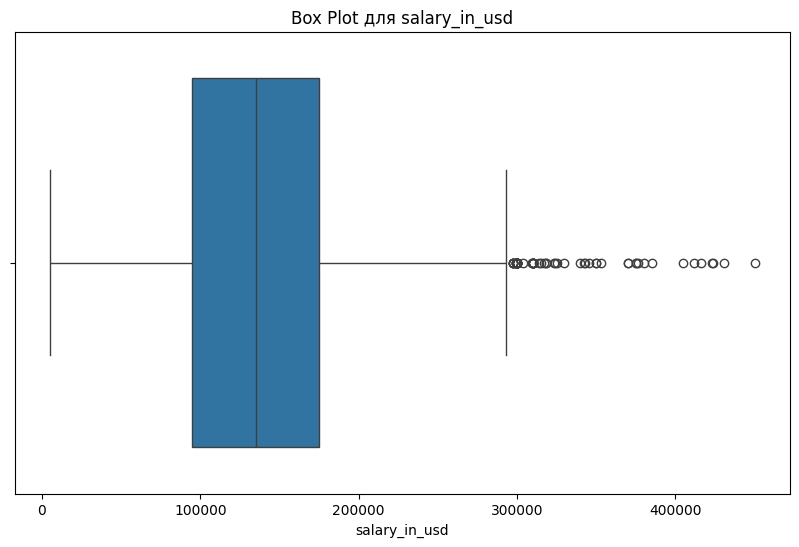

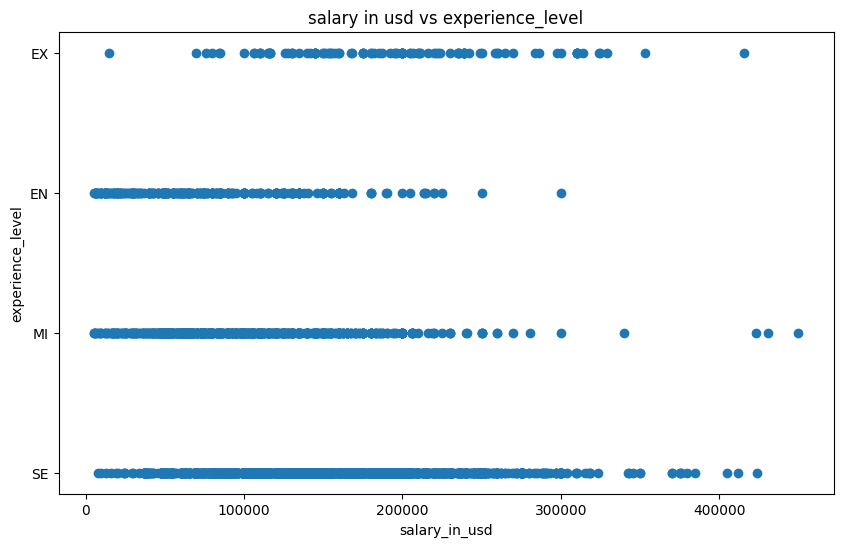

In [8]:
# Визуализация данных - ящик с усами. Выборка относительно сбалансирована, есть среднее смещение в среднюю сторону, медиана уравновешена
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["salary_in_usd"])
plt.title("Box Plot для salary_in_usd")
plt.xlabel("salary_in_usd")
plt.show()

# Визуализируем отношение размера компании и зарплаты
plt.figure(figsize=(10, 6))
plt.scatter(df["salary_in_usd"], df["experience_level"])
plt.xlabel("salary_in_usd")
plt.ylabel("experience_level")
plt.title("salary in usd vs experience_level")
plt.show()

### Проблема выбранного набора данных  
**Зашумленность:**  
Возможное присутствие некорректных или неполных данных, например, ошибки в заполнении зарплат или местоположений.
Необходима очистка данных от выбросов и ошибок.  

**Смещение:**  
Могут быть смещения в данных по странам или компаниям, например, если большая часть выборки состоит из сотрудников одной страны или отрасли.  

**Актуальность:**  
Если данные собраны за несколько лет, некоторые зарплаты могут быть неактуальны для текущего рынка, что требует дополнительной актуализации.  

**Выбросы:**  
Возможны экстремальные значения в зарплатах, которые необходимо либо исключить, либо обработать, чтобы не искажать модели.  

**Просачивание данных:**  
Если в данных есть признаки, которые могут напрямую предсказывать зарплату (например, если salary_currency или company_size напрямую коррелируют с зарплатой), это может привести к ошибкам в моделях.

### Борьба с выбросами

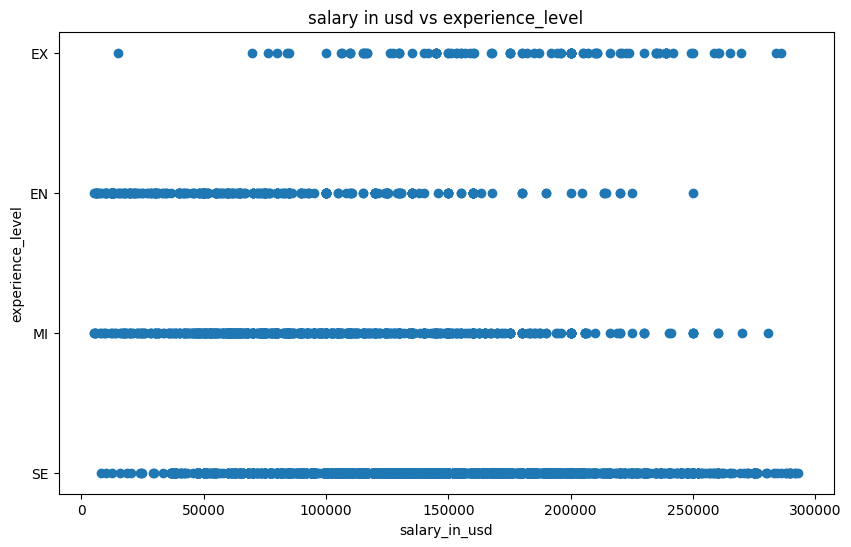

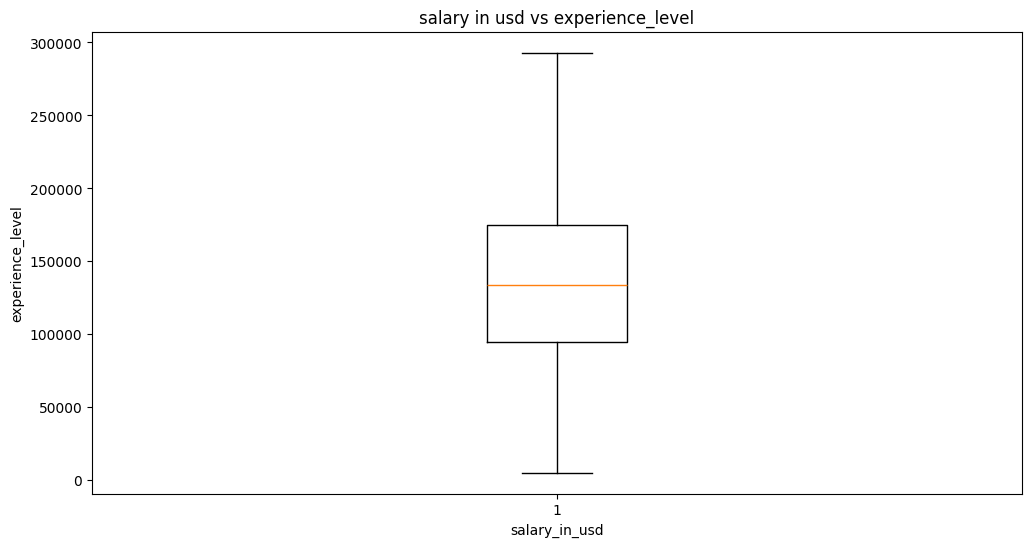

In [9]:
# Статистический анализ для определения выбросов
Q1 = df["salary_in_usd"].quantile(0.25)
Q3 = df["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df["salary_in_usd"] < (Q1 - threshold)) | (
    df["salary_in_usd"] > (Q3 + threshold)
)

# Обработка выбросов
# В данном случае мы уберем выбросы
median_salary = df["salary_in_usd"].median()
df.loc[outliers, "salary_in_usd"] = 0
df1 = df[df.salary_in_usd != 0]

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df1["salary_in_usd"], df1["experience_level"])
plt.xlabel("salary_in_usd")
plt.ylabel("experience_level")
plt.title("salary in usd vs experience_level")
plt.show()

# Визуализация данных после обработки
plt.figure(figsize=(12, 6))
plt.boxplot(df1["salary_in_usd"])
plt.xlabel("salary_in_usd")
plt.ylabel("experience_level")
plt.title("salary in usd vs experience_level")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Пример датасета с данными (X — признаки, y — целевой признак)
X = df.drop(columns=["salary_in_usd"])  # Признаки (все столбцы, кроме целевого признака 'salary')
y = df["salary_in_usd"]  # Целевая переменная

# Разделяем данные на обучающую (60%), временную (40%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Временную выборку делим пополам на контрольную (20%) и тестовую (20%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверяем размер выборок
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер контрольной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")

Размер обучающей выборки: 2253
Размер контрольной выборки: 751
Размер тестовой выборки: 751


Теперь оценим сбалансированность, если нужно использовать методы аугментации данных, то применим. Анаализ проведём в категории 'salary_in_usd', в которой может потребоваться применение oversampling или undersampling.

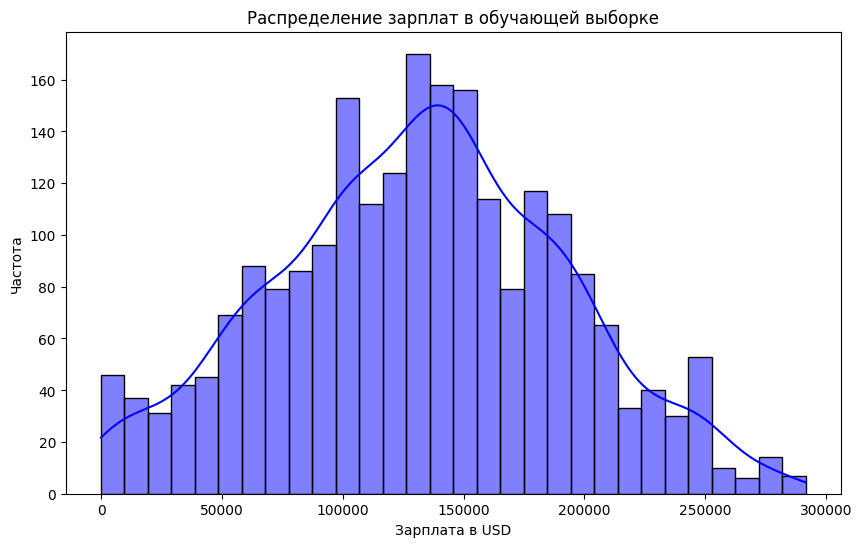

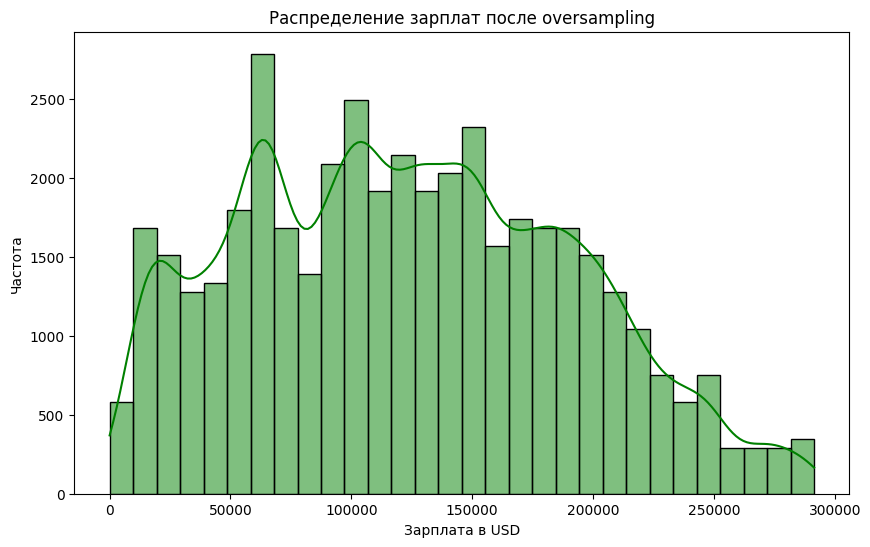

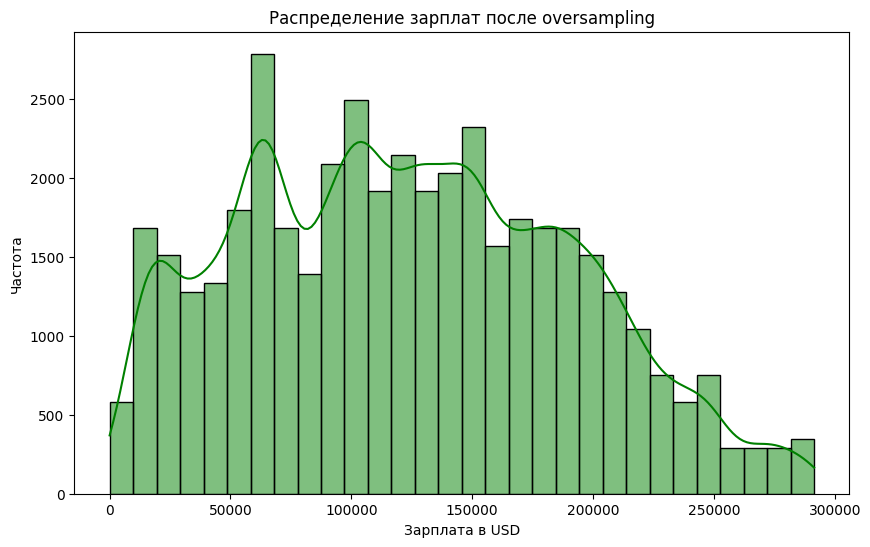

Количество записей в обучающей выборке до аугментации: 2253
Количество записей в обучающей выборке после oversampling: 42746
Количество записей в обучающей выборке после undersampling: 737

Распределение salary_in_usd в обучающей выборке:
salary_in_usd
100000    58
150000    58
120000    53
160000    52
130000    48
          ..
156868     1
206699     1
12767      1
151800     1
62649      1
Name: count, Length: 737, dtype: int64

Распределение salary_in_usd в контрольной выборке:
salary_in_usd
100000    24
150000    21
130000    16
160000    15
135000    15
          ..
166000     1
75050      1
77262      1
165220     1
83171      1
Name: count, Length: 365, dtype: int64

Распределение salary_in_usd в тестовой выборке:
salary_in_usd
120000    24
150000    19
130000    18
100000    17
160000    17
          ..
106250     1
149600     1
214200     1
74000      1
229998     1
Name: count, Length: 361, dtype: int64




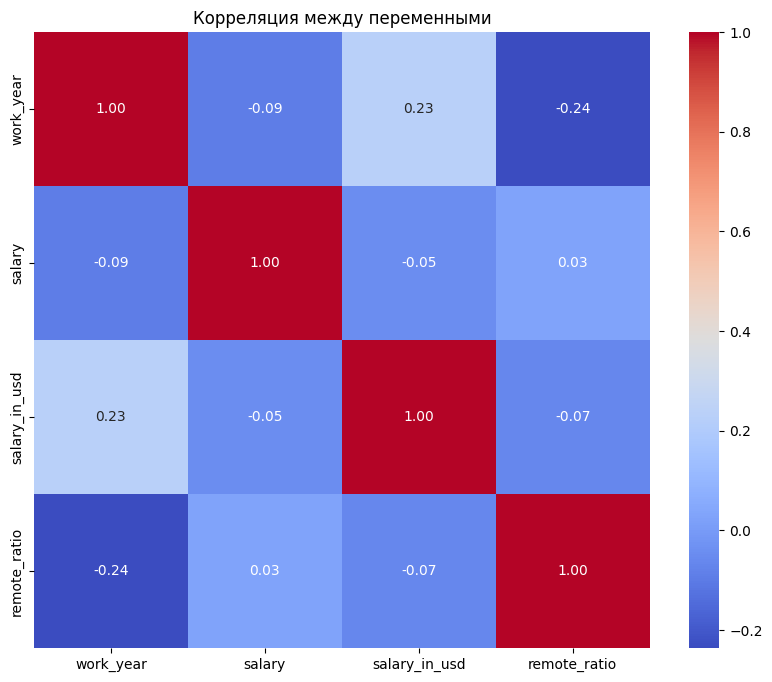

In [14]:
from imblearn.over_sampling import RandomOverSampler

# Визуализация распределения зарплат в обучающей выборке
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title('Распределение зарплат в обучающей выборке')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.show()

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Визуализация распределения после oversampling
plt.figure(figsize=(10, 6))
sns.histplot(y_train_ros, bins=30, kde=True, color='green')
plt.title('Распределение зарплат после oversampling')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.show()

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Визуализация распределения после oversampling
plt.figure(figsize=(10, 6))
sns.histplot(y_train_ros, bins=30, kde=True, color='green')
plt.title('Распределение зарплат после oversampling')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.show()

print(f"Количество записей в обучающей выборке до аугментации: {len(y_train)}")
print(f"Количество записей в обучающей выборке после oversampling: {len(y_train_ros)}")
print(f"Количество записей в обучающей выборке после undersampling: {len(y_train_rus)}")
print()

train_df, val_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

# Функция для проверки распределения
def check_balance(df, name):
    counts = df['salary_in_usd'].value_counts()  # Обращение к столбцу 'salary_in_usd'
    print(f"Распределение salary_in_usd в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")
print()

# Корреляция
# Сначала отбираем только числовые столбцы
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Корреляция между переменными")
plt.show()

## 2. Второй набор данных Diamonds Prices (Цены на бриллианты)

Выгрузка данных из CSV файла в датафрейм

In [16]:
# Загрузка данных
df = pd.read_csv("..//static//csv//diamonds_prices2022.csv")

# Вывод
print(df.columns)

print()

df.info()

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Описание набора:** В этом наборе данных содержится информация о ценах на бриллианты. Представлен датасет с ценами и характеристиками около 54 000 бриллиантов круглой огранки. Всего в наборе 53 940 бриллиантов, описанных 10 признаками: карат, огранка, цвет, прозрачность, глубина, таблица, цена, x, y и z. Большинство признаков имеют числовую природу, однако переменные cut, color и clarity являются упорядоченными факторными переменными с определенными уровнями. Цена в столбце "price" указана в долларах ($), а столбцы x, y и z представляют собой размеры бриллианта (x — длина в мм, y — ширина в мм, z — глубина в мм).

In [17]:
# Для наглядности
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [18]:
# Описание данных (основные статистические показатели)
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935     61.749322     57.457251   3932.734294   
std    15572.147122      0.473999      1.432626      2.234549   3989.338447   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26972.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.500000      1.040000     62.500000     59.000000   5324.000000   
max    53943.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53943.000000  53943.000000  53943.000000  
mean       5.731158      5.734526      3.538730  
std        1.121730      1.142103      0.705679  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [19]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [20]:
df.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

Нет пропущенных данных

## Анализ сведений о наборе данных

**Набор данных:** Набор данных содержит 53 940 наблюдений, каждое из которых представляет собой бриллиант с характеристиками, такими как вес (карат), огранка, цвет, прозрачность, глубина, размеры (x, y, z), а также цена.

**Проблемная область:** Проблемной областью может быть задача оценки стоимости бриллианта на основе его характеристик, что важно для торговли бриллиантами, определения их рыночной стоимости и других бизнес-задач.

Проанализируем содержимое...

*Объекты наблюдения:* Каждый бриллиант будет объектом наблюдения.  

*Атрибуты объектов:* Основные атрибуты представляют собой числовые характеристики такие, как carat (вес), depth (глубина в бриллианте - расстояние от площадки до каллеты. Калетта - нижняя часть бриллианта), table (площадка - большая грань бриллианта), x,y,z - размеры. Категориальные характеристики такие, как cut (огранка), color (цвет) и clarity (прозрачность).  

*Связи между объектами:* Вес бриллианта влияет на цену (carat -> price), также существует связь между качеством огранки и ценой (cut -> price)

### Бизнес-цель
1. Автоматизация процесса оценки стоимости бриллианта  
Построить модель для оценки цены бриллианты на основе его характеристик. Эффект для бизнеса от анализа данных заключается в улучшении  бизнес-процессов (повышение эффективности операционных процессов), повышении доходов, сокращении затрат и улучшению клиентских отношений.  
2. Оптимизация ассортимента и продаж  
Построить модель для анализа данных, какие характеристики бриллиантов наиболее востребованы и наилучшим образом влияют на рост продаж. Эффект для бизнеса в том, что компании могут оптимизировать ассортимент на более востребованные, что приведёт к увеличению продаж.

### Техническая цель
1. Разработка модели для оценки стоимости бриллиантов  
Создать модель машинного обучения, которая на вход получает характеристики бриллианта (вес, огранка, цвет и т.д.) и предсказывает его цену. 
На вход поступают характеристики, а целевой признак - цена бриллианта.  
2. Оптимизация ассортимента и прогнозирование спроса  
Создать модель для предсказания спроса (популярности) определённых категорий бриллиаантов в зависимости от их характеристик. НА вход поступают характеристики бриллианта, а целевой признак - показатели продаж или востребованность товара.

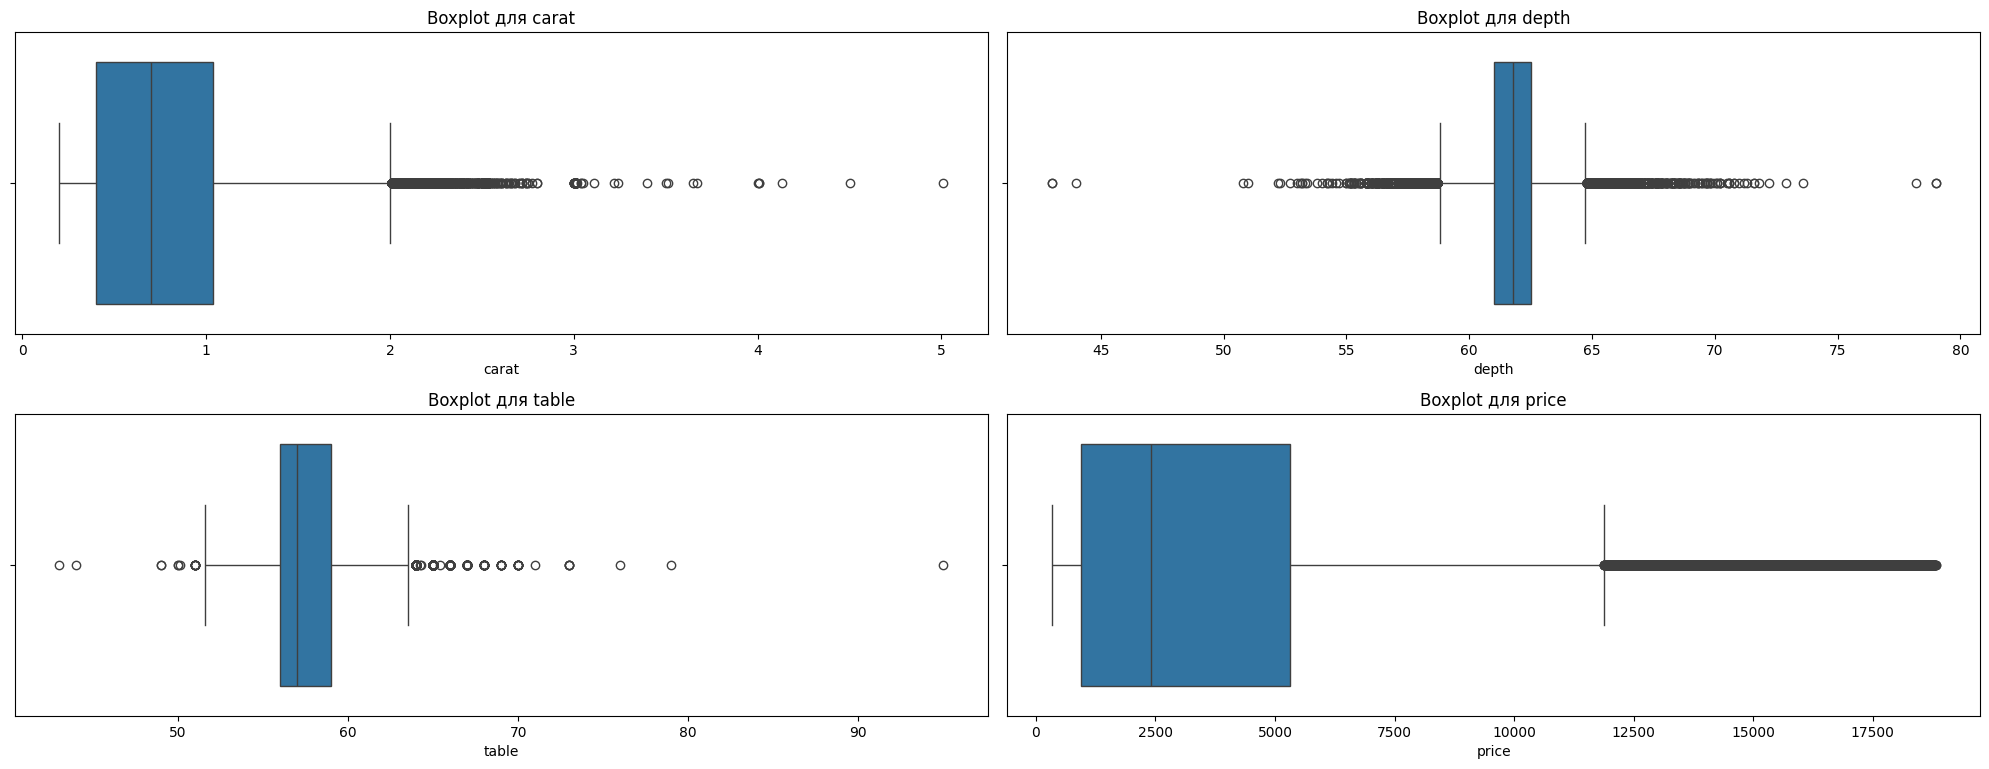

In [21]:
# Построим графики boxplot для обнаружения выбросов
plt.figure(figsize=(20, 15))

# Создание boxplot
for i, column in enumerate(['carat', 'depth', 'table', 'price'], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot для {column}")
    
plt.tight_layout()
plt.show()

### Проблема выбранного набора данных 
*Зашумленность данных:* Может быть обнаружена через большое количество выбросов (аномальных значений). Выбросы могут выходить за нормальные границы. Они наблюдаются во всех графиках, которые мы построили. Если у определённого параметра много выбросов, то данные могут быть зашумлены или содержат необычные значения, которые стоит анализировать и, возможно, удалить или скорректировать. Графики boxplot помогают визуализировать распределение данных и выявить выбросы, которые находятся за пределами "усов" боксплота.

Попробуем решить устранить проблему выбросов для table и depth. Используется метод усреднения данных для устранения выбросов. Метод стандартных отклонений.

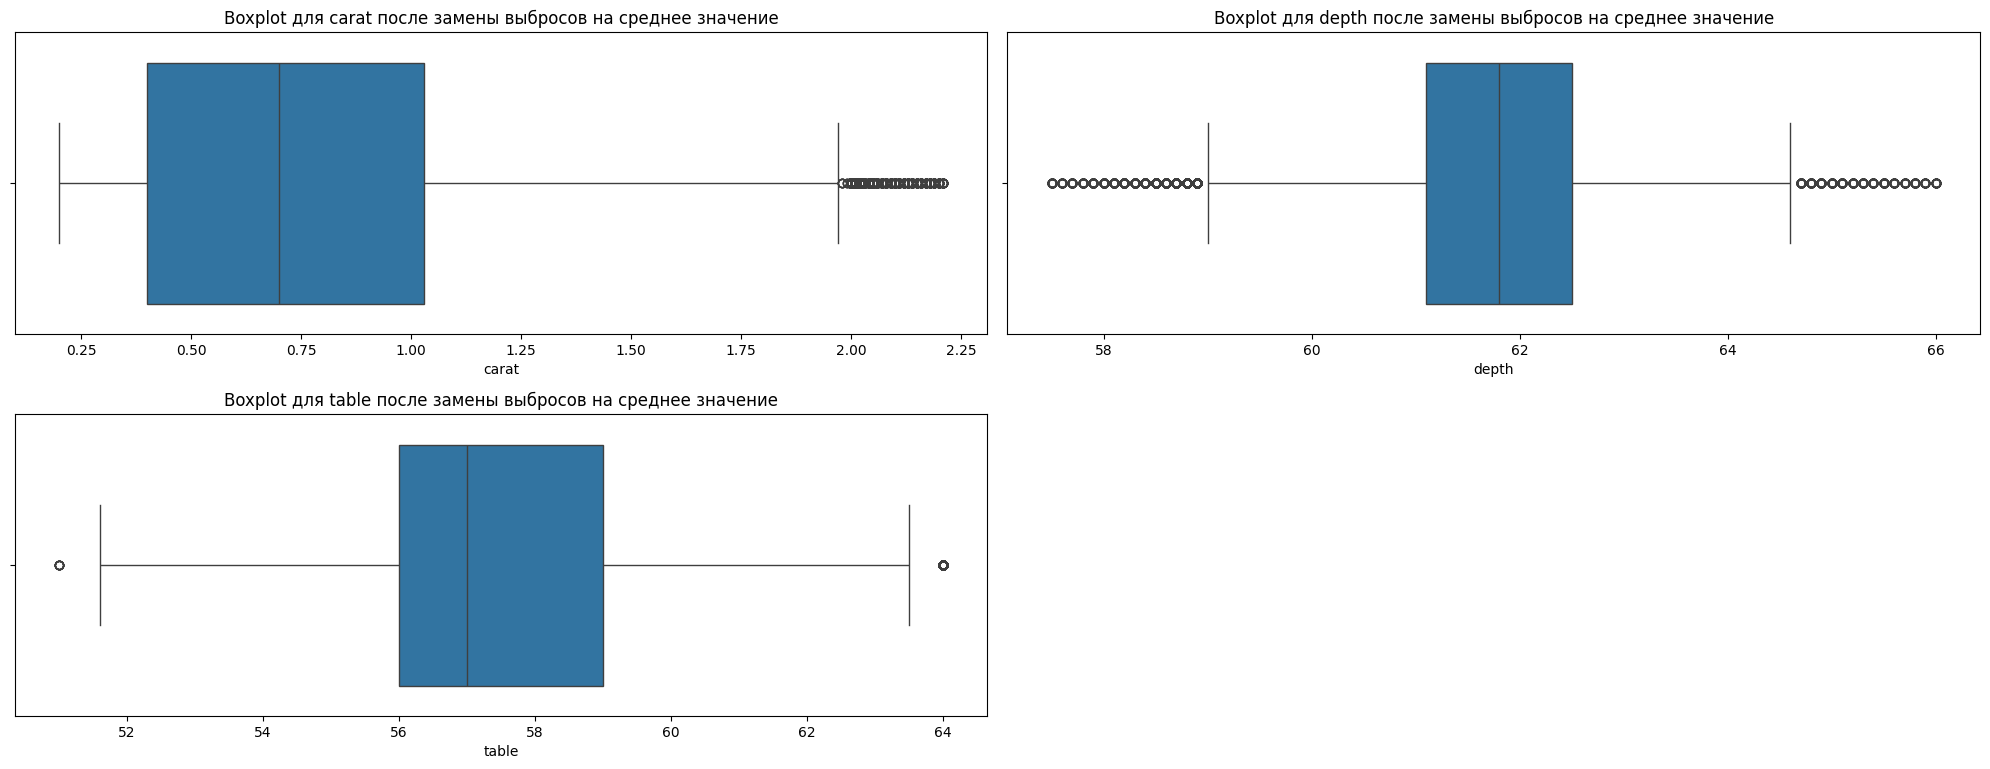

In [22]:
# Вычисление среднего и стандартного отклонения для столбцов
means = df[['carat', 'depth', 'table']].mean()
std_devs = df[['carat', 'depth', 'table']].std()

# Определение порога для выбросов (например, 3 стандартных отклонения)
threshold = 3

# Функция для замены выбросов на среднее значение
def replace_outliers_with_mean(column):
    mean_value = column.mean()
    upper_limit = mean_value + threshold * column.std()
    lower_limit = mean_value - threshold * column.std()
    
    return column.where((column >= lower_limit) & (column <= upper_limit), mean_value)

# Применение функции к каждому столбцу
for column in ['depth', 'table', 'carat']:
    df[column] = replace_outliers_with_mean(df[column])

# Графическое отображение после замены выбросов
plt.figure(figsize=(20, 15))
for i, column in enumerate(['carat', 'depth', 'table'], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot для {column} после замены выбросов на среднее значение")

plt.tight_layout()
plt.show()

Этот подход позволяет вам обрабатывать выбросы, не прибегая к квантилям и он наверяка избавит от выбросов. Однако стоит отметить, что использование стандартных отклонений может не всегда быть оптимальным для всех распределений данных, потому что данные могут быть плохо распределены. А использование медианы с квантилями вместо среднего значения помогает лучше справиться с выбросами, особенно если распределение данных имеет сильные отклонения.

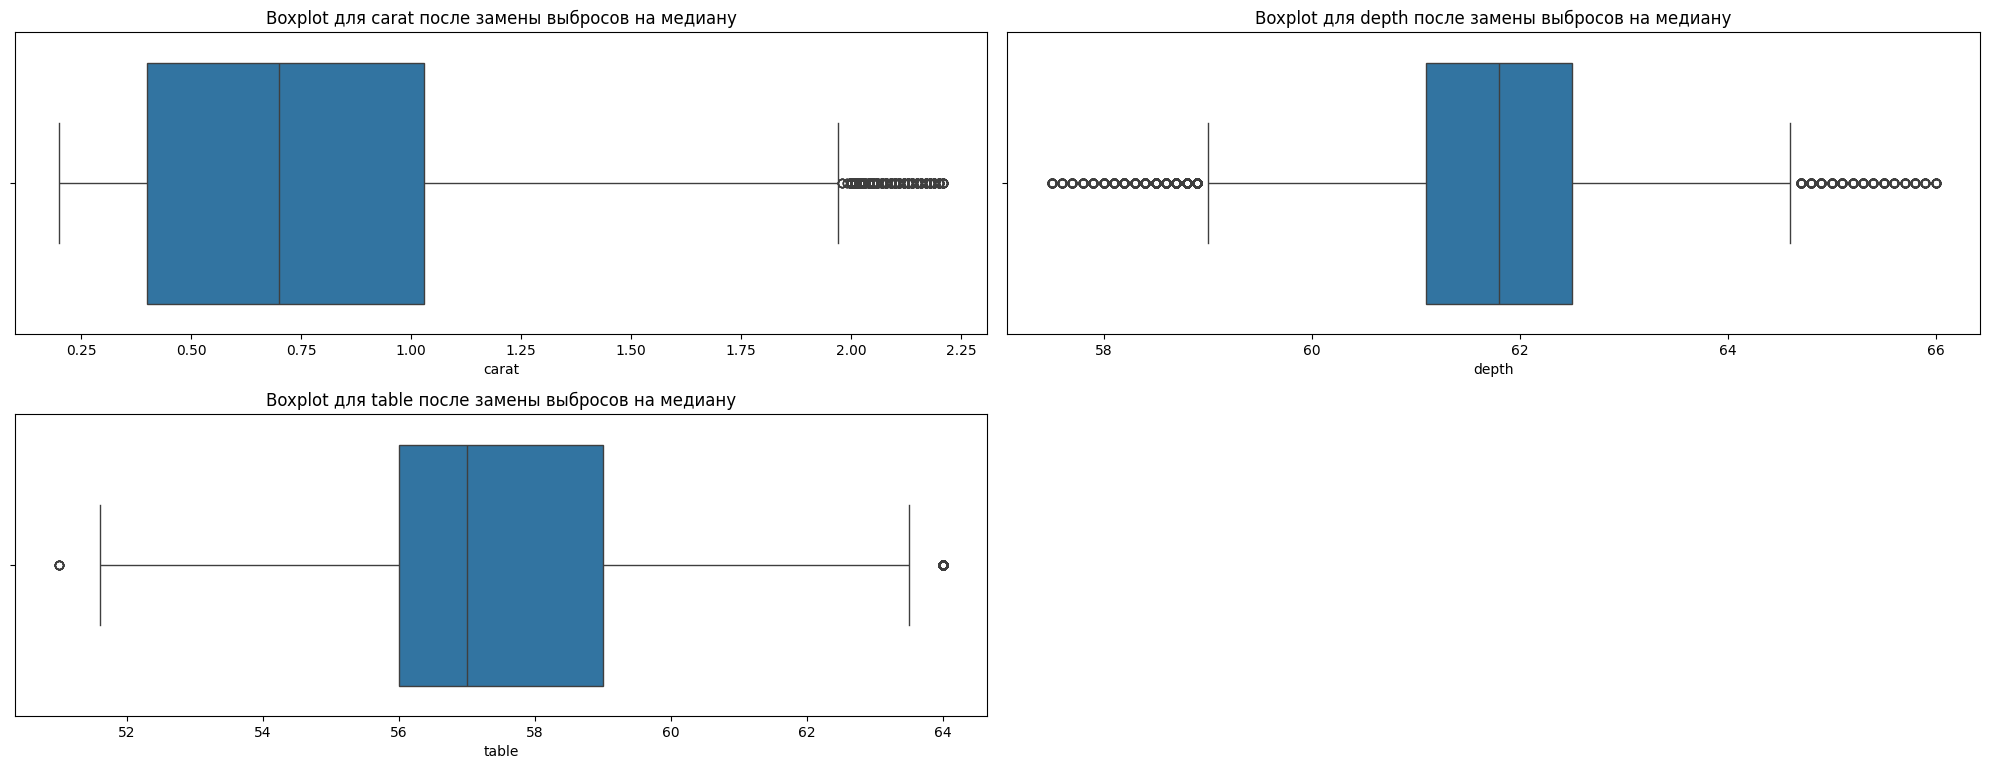

In [23]:
# Вычисление квантилей для каждого столбца
Q1 = df[['carat', 'depth', 'table']].quantile(0.01)
Q3 = df[['carat', 'depth', 'table']].quantile(0.99)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Функция для замены выбросов на медианное значение
def replace_outliers_with_median(column):
    median_value = column.median()
    return column.where((column >= lower_bound[column.name]) & (column <= upper_bound[column.name]), median_value)

# Применение функции к каждому столбцу
for column in ['depth', 'table', 'carat']:
    df[column] = replace_outliers_with_median(df[column])

# Графическое отображение после замены выбросов
plt.figure(figsize=(20, 15))
for i, column in enumerate(['carat', 'depth', 'table'], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot для {column} после замены выбросов на медиану")

plt.tight_layout()
plt.show()

*Актуальность данных* — это проблема, которая возникает, когда данные устарели или больше не отражают текущую ситуацию. Это часто встречается в данных о ценах.  
*Просачивание данных* происходит, когда в обучающей выборке присутствует информация, которая не должна быть известна модели на этапе обучения. В данном случае это может происходить, если некоторые переменные, такие как цена, сильно коррелируют с целевым признаком и тем самым искажают результат. Проверка на наличие утечек данных.  
*Смещение в данных* может возникать, если датасет не полностью репрезентативен для реальной популяции бриллиантов. Например, если в датасете больше дешёвых или дорогих бриллиантов, это создаёт смещение в оценке моделей  
Код ниже проверяет данные на распредение признаков и просачивание данных.

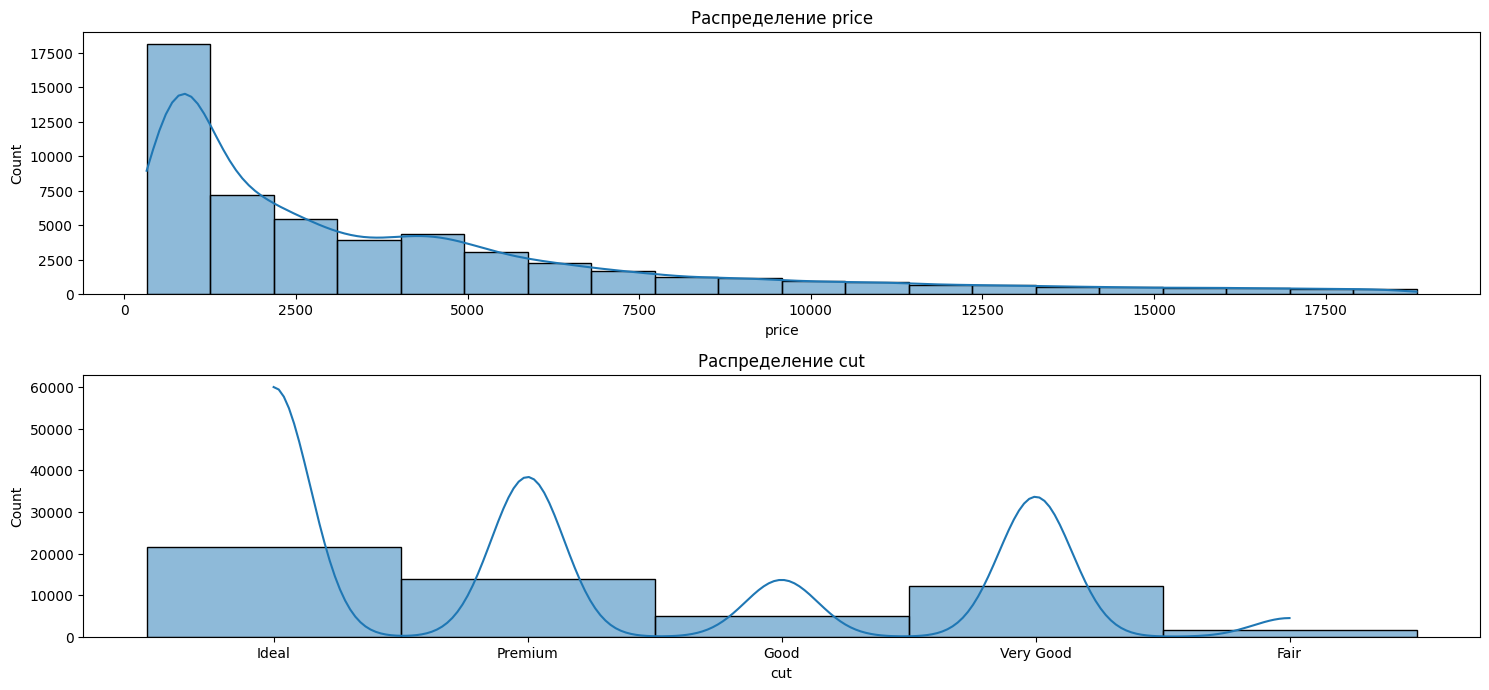

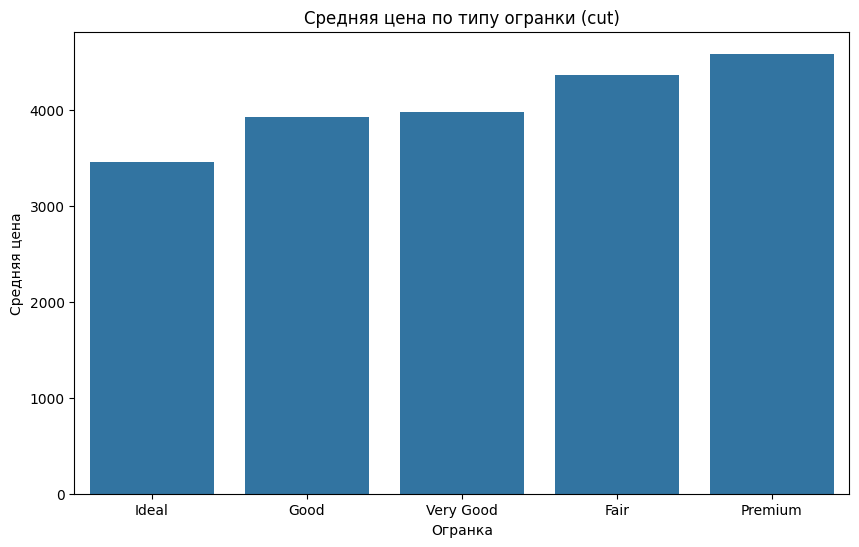

In [24]:
# Проверка распределения признаков
plt.figure(figsize=(15, 10))
for i, column in enumerate(['price', 'cut'], 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f"Распределение {column}")
plt.tight_layout()
plt.show()

# Средняя цена по типу огранки (cut)
cut_price_mean = df.groupby('cut')['price'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=cut_price_mean.index, y=cut_price_mean.values)
plt.title("Средняя цена по типу огранки (cut)")
plt.xlabel("Огранка")
plt.ylabel("Средняя цена")
plt.show()

Для решения проблем с просачиваниям, проведём корелляционый анализ между признаками и целевым признаком.  

Корреляция признаков с ценой (price):
price            1.000000
carat            0.888400
x                0.884433
y                0.865419
z                0.861249
table            0.131857
clarity_SI2      0.128427
color_I          0.097130
cut_Premium      0.095685
color_J          0.081714
color_H          0.059229
clarity_SI1      0.008940
color_G          0.008564
cut_Very Good    0.006589
cut_Good        -0.000307
clarity_VS2     -0.001066
clarity_VS1     -0.009879
depth           -0.014643
color_F         -0.024166
clarity_IF      -0.049593
clarity_VVS2    -0.052375
clarity_VVS1    -0.095261
cut_Ideal       -0.097160
color_E         -0.101101
Unnamed: 0      -0.306875
Name: price, dtype: float64


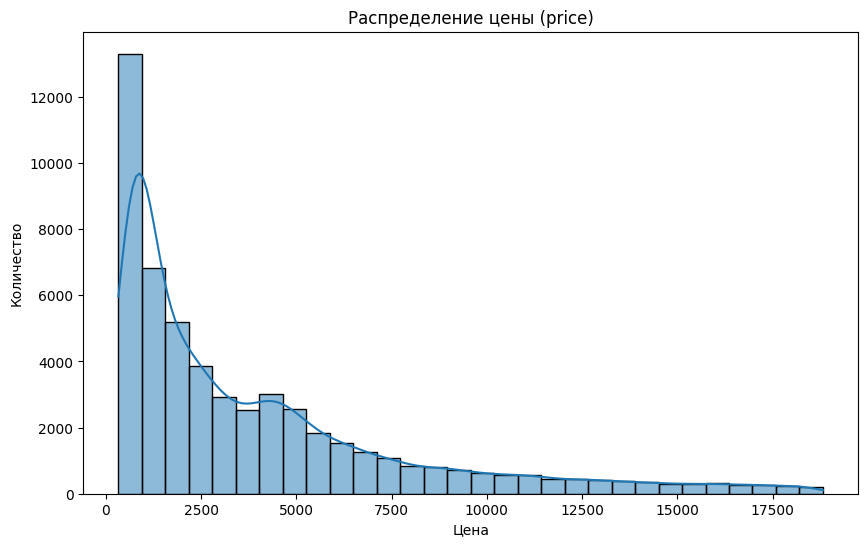

In [25]:
from sklearn.model_selection import train_test_split

# Преобразуем все категориальные данные в числовые
# Проверим, какие столбцы являются категориальными
categorical_columns = df.select_dtypes(include=['object']).columns

# Применяем one-hot encoding к категориальным столбцам
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Вычисляем корреляцию для преобразованных данных
correlations = df_encoded.corr()['price'].sort_values(ascending=False)
print("Корреляция признаков с ценой (price):")
print(correlations)

# Визуализация распределения цены (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цены (price)')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

# Разделение данных на обучающую и тестовую выборки
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['cut'])


Количество дубликатов: 0


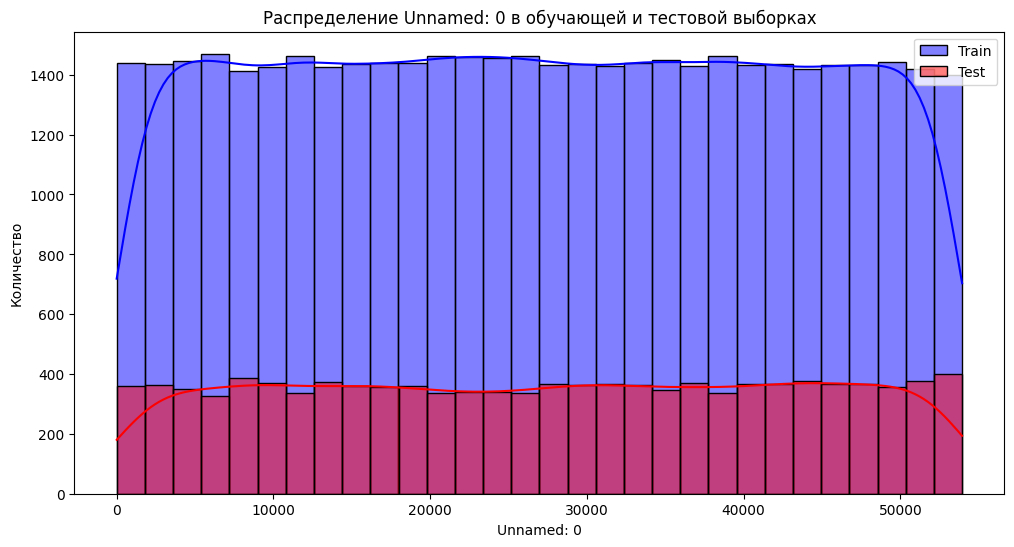

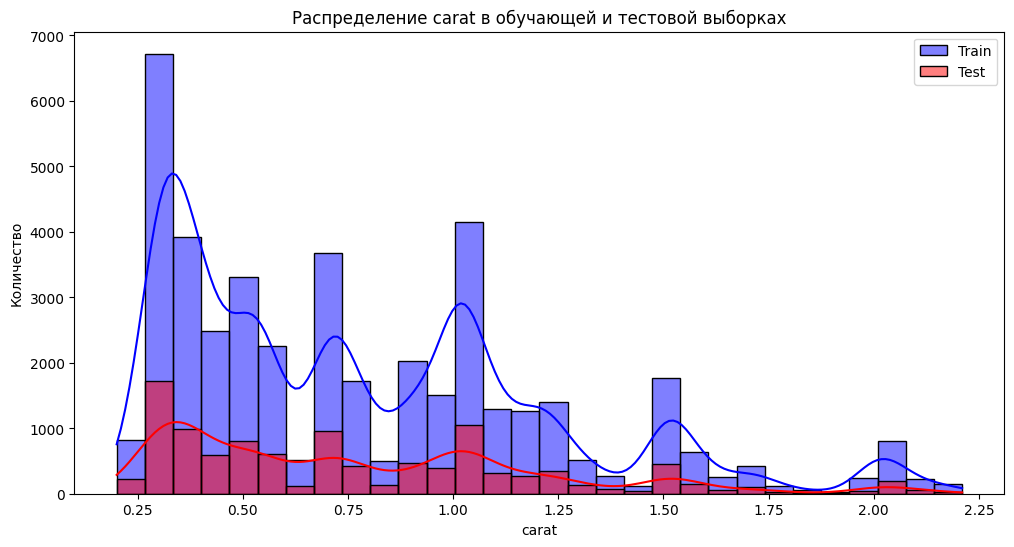

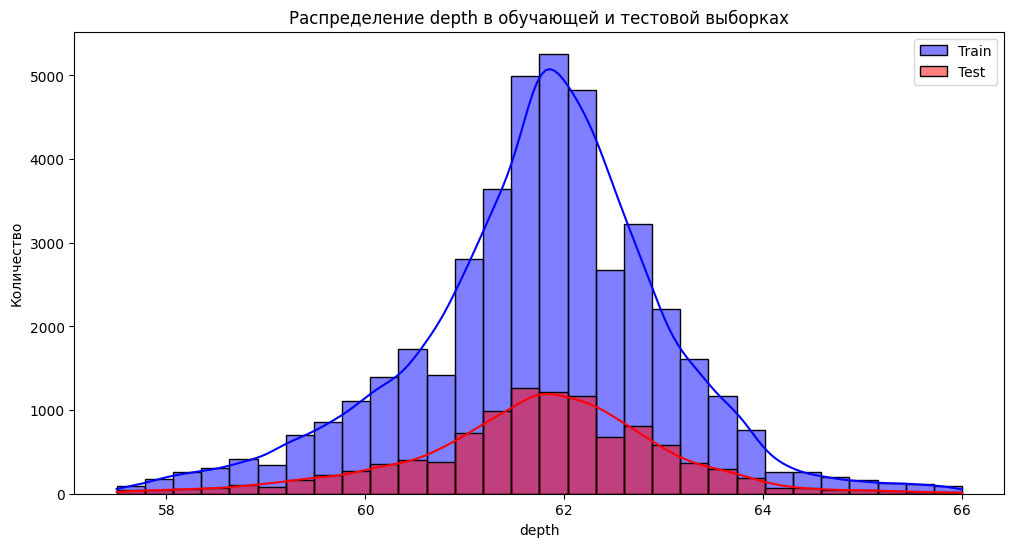

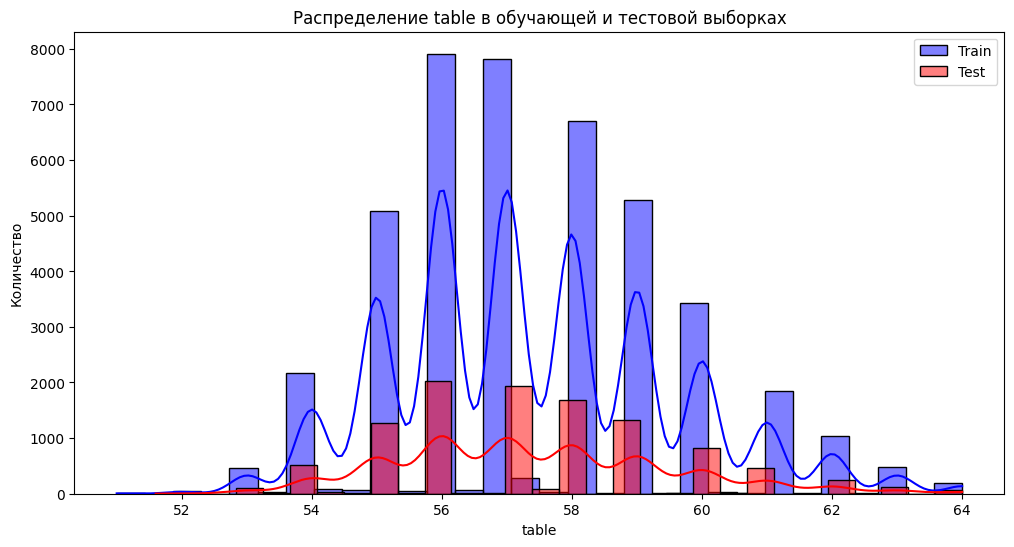

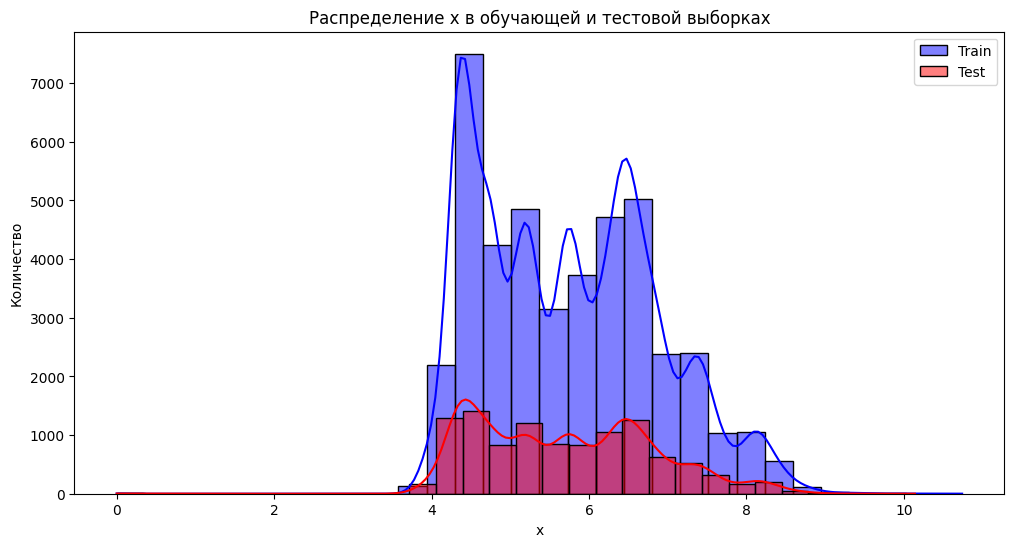

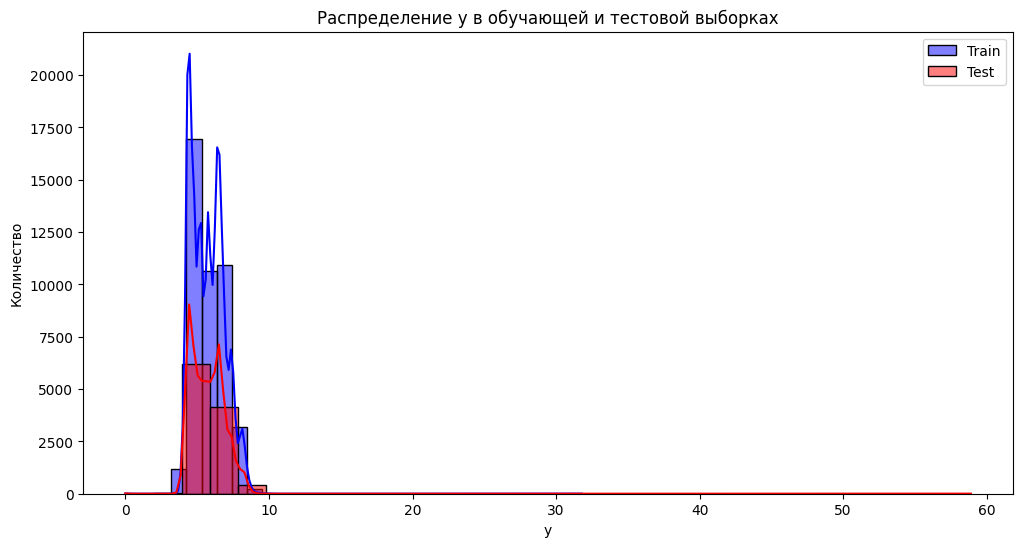

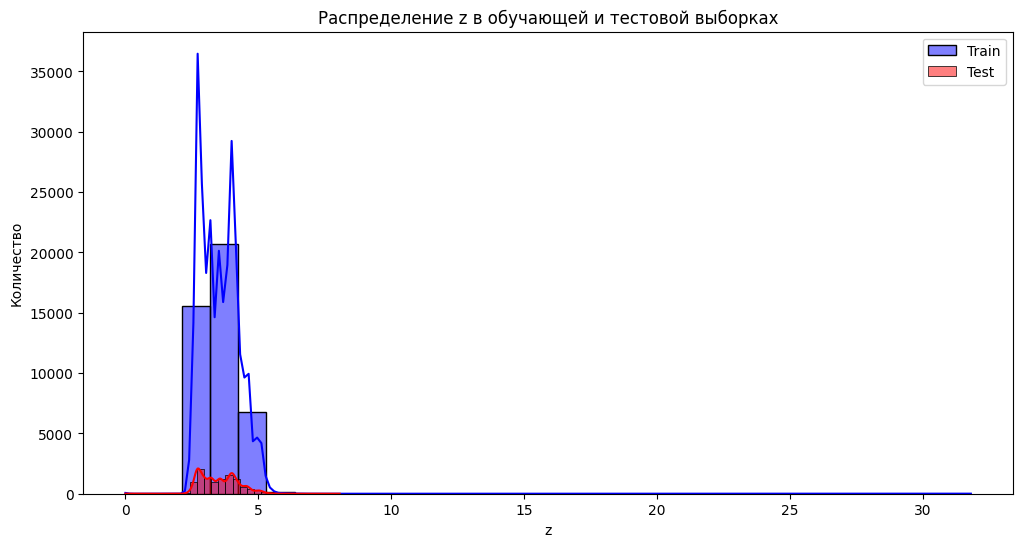

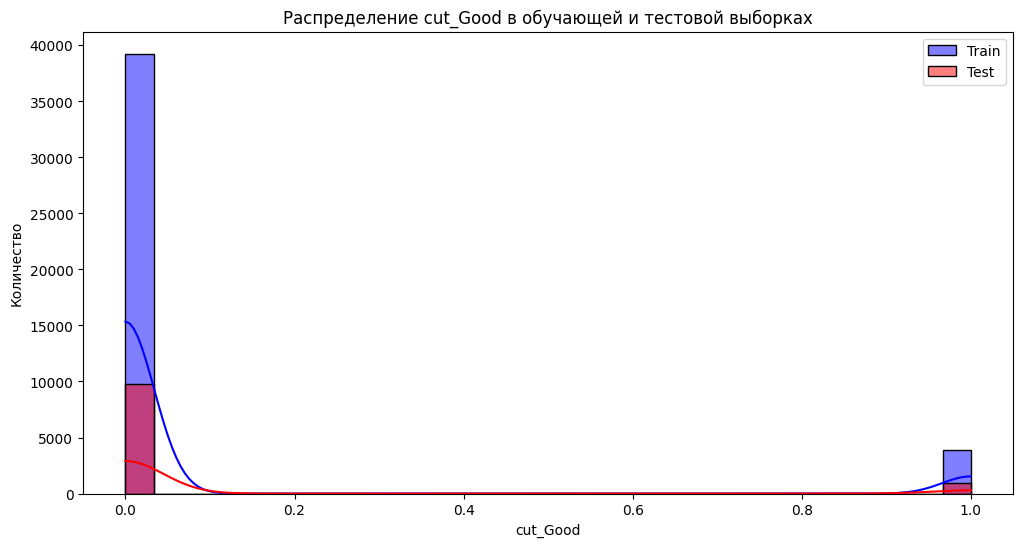

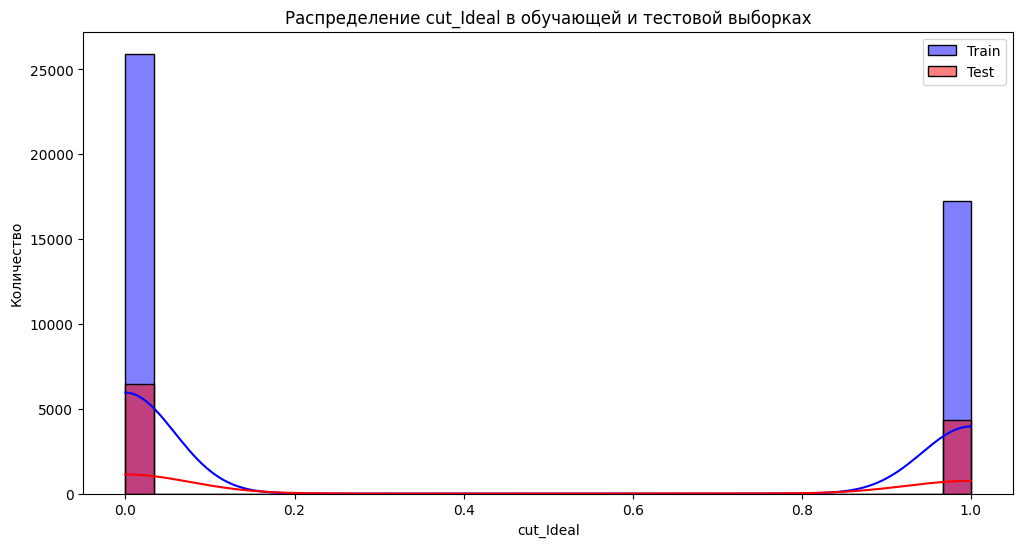

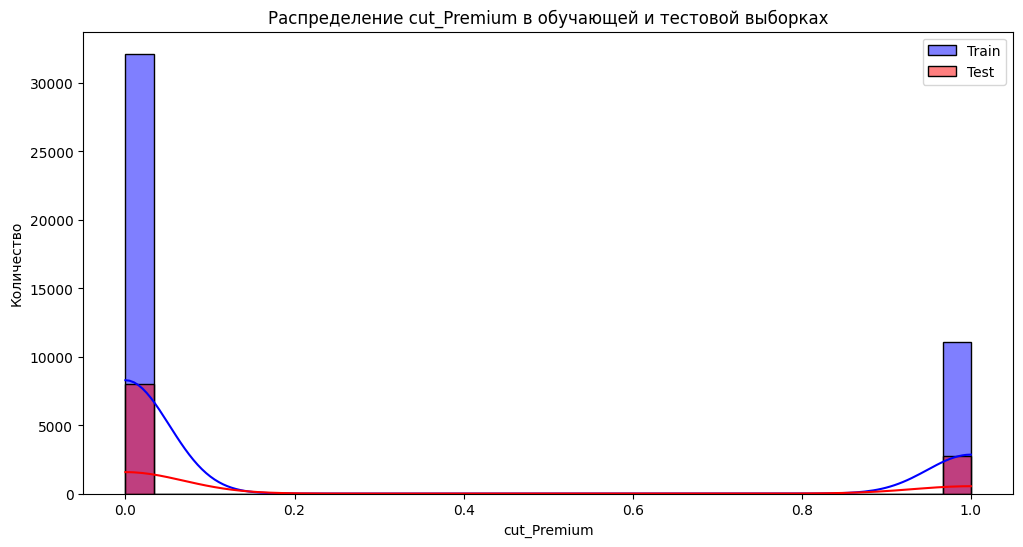

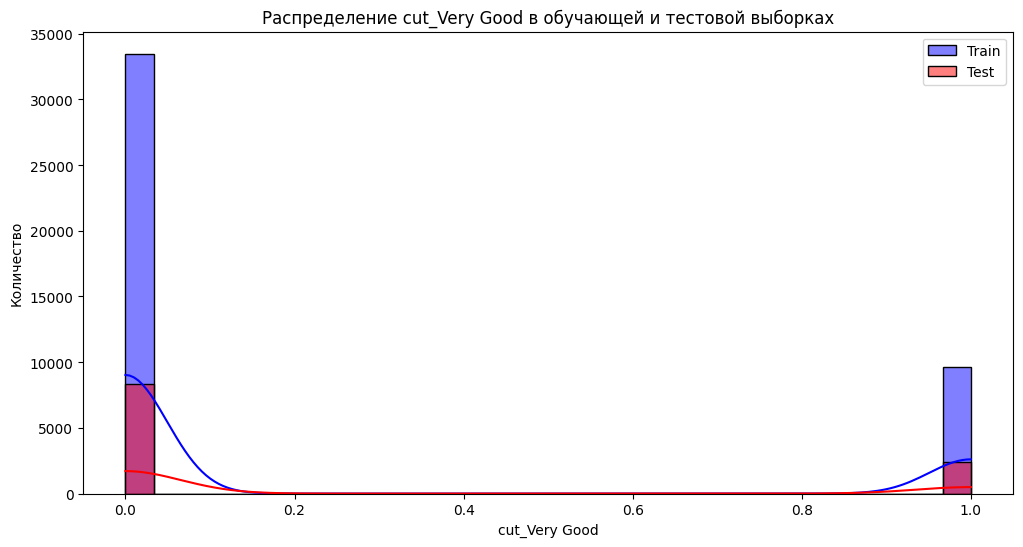

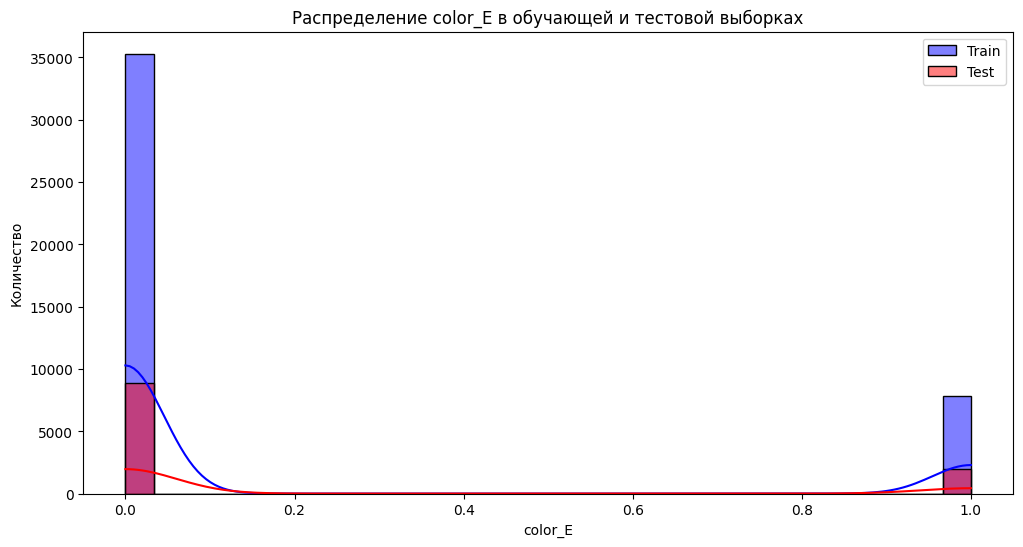

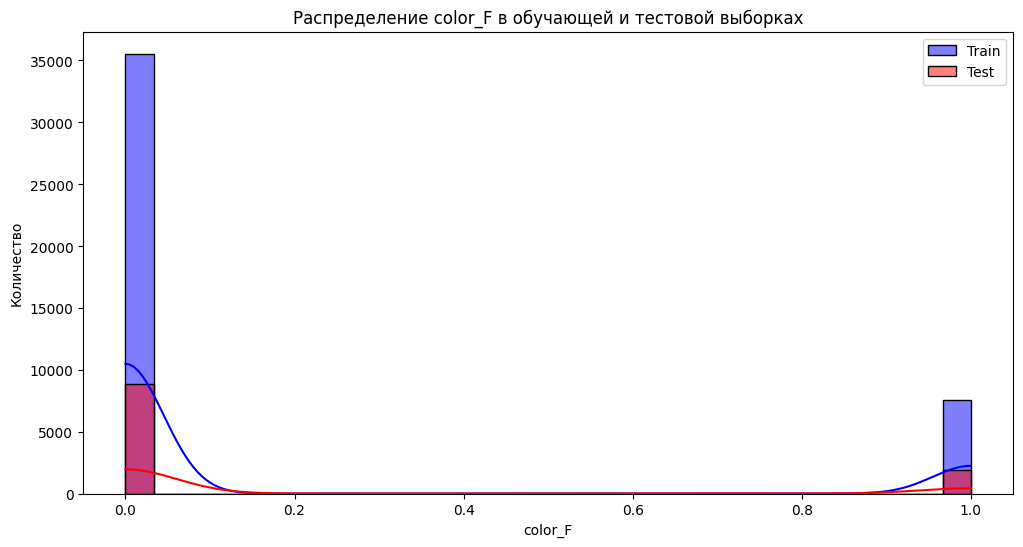

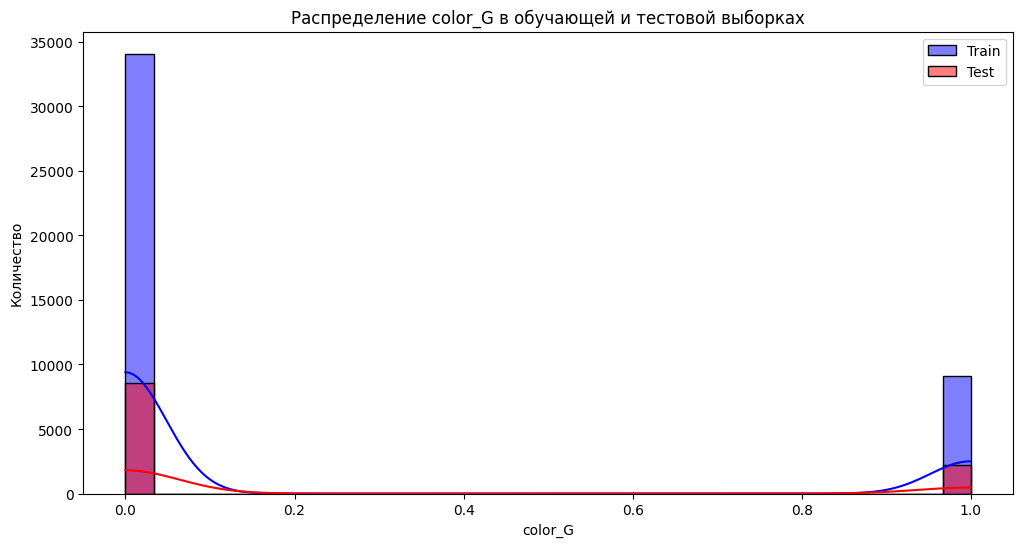

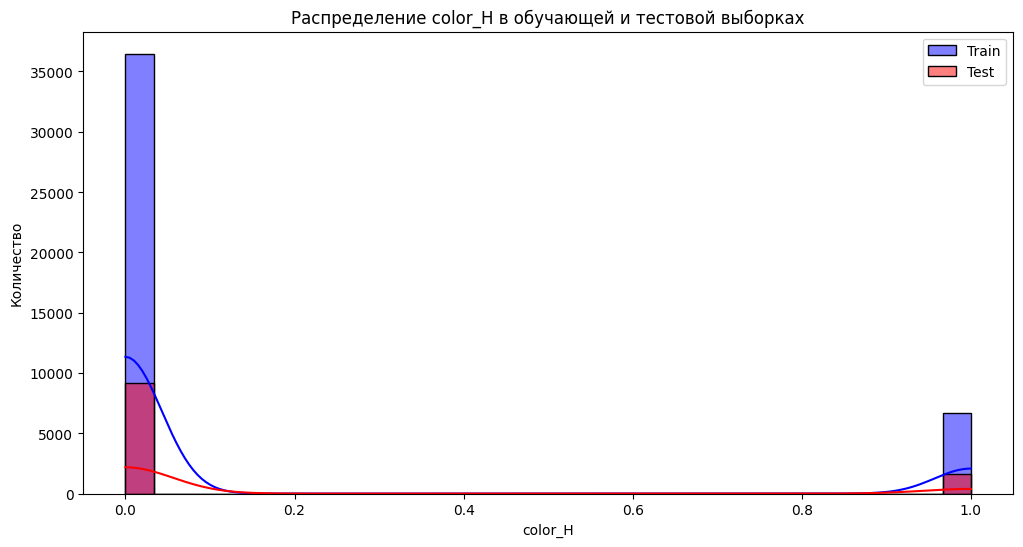

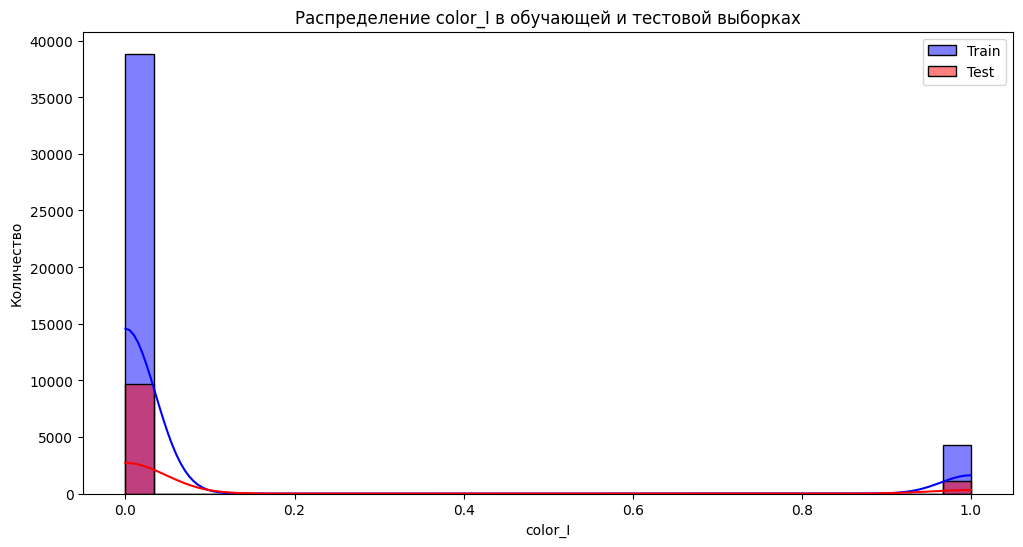

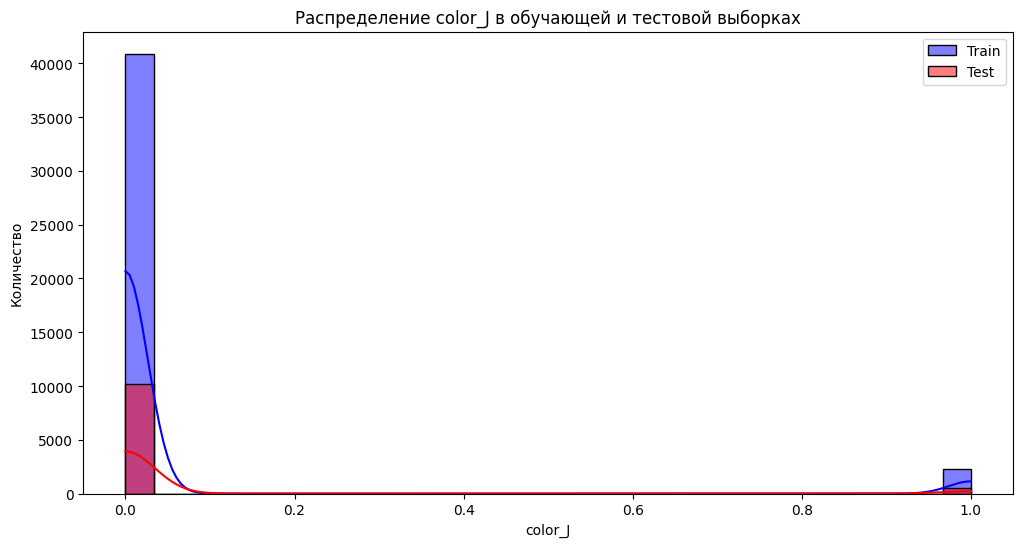

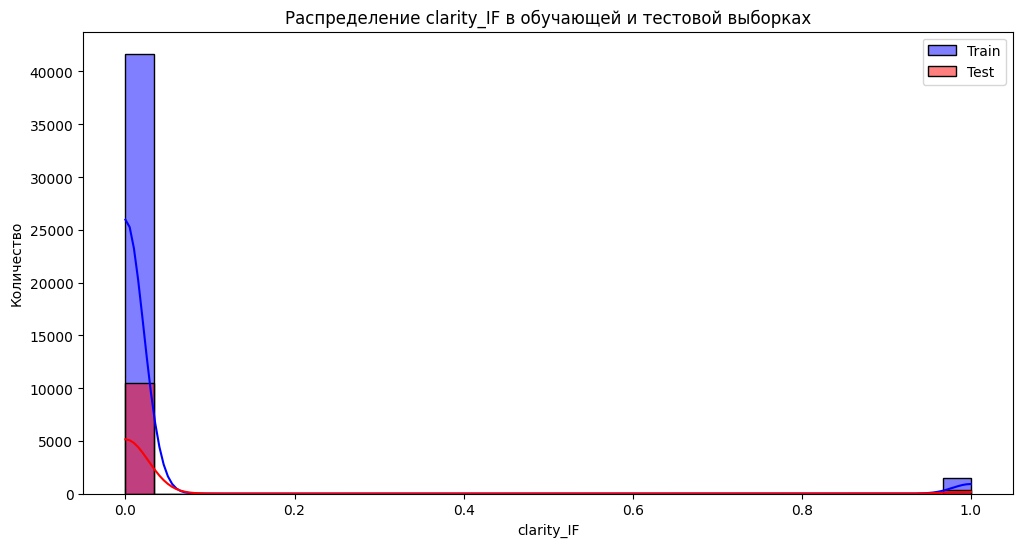

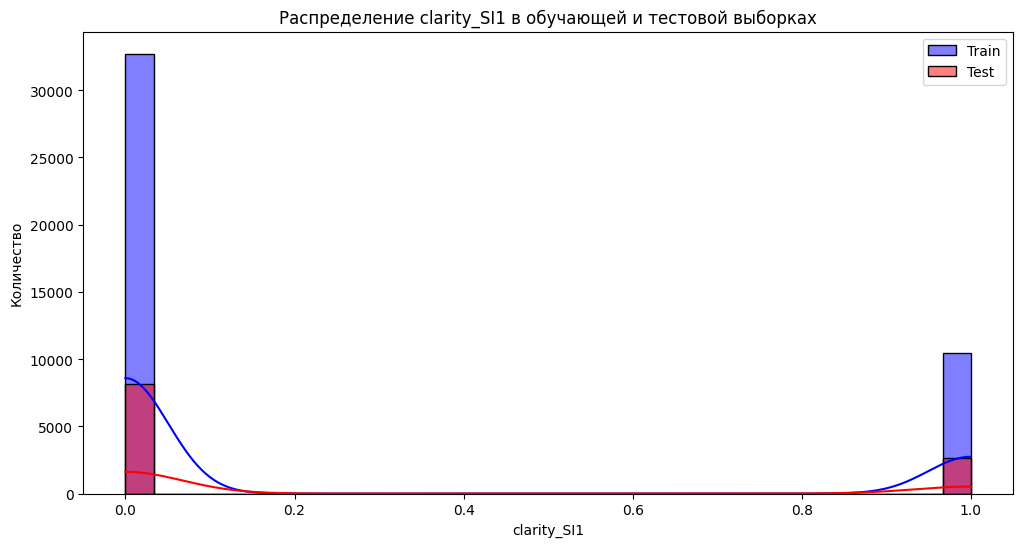

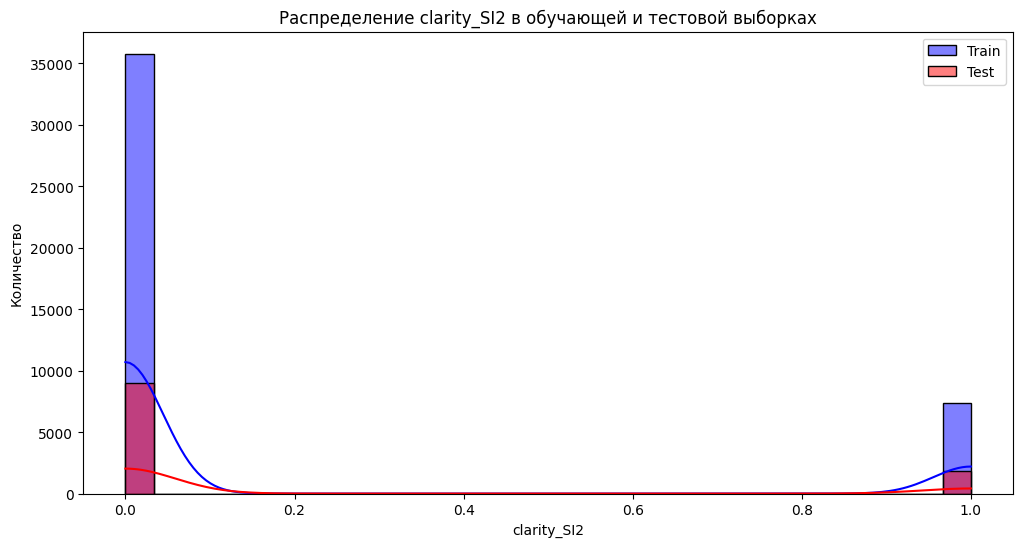

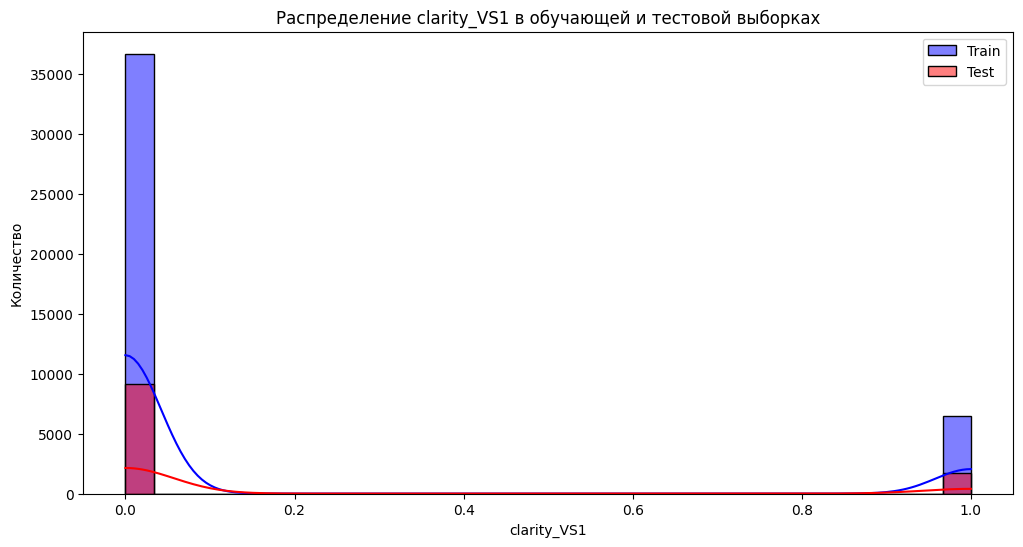

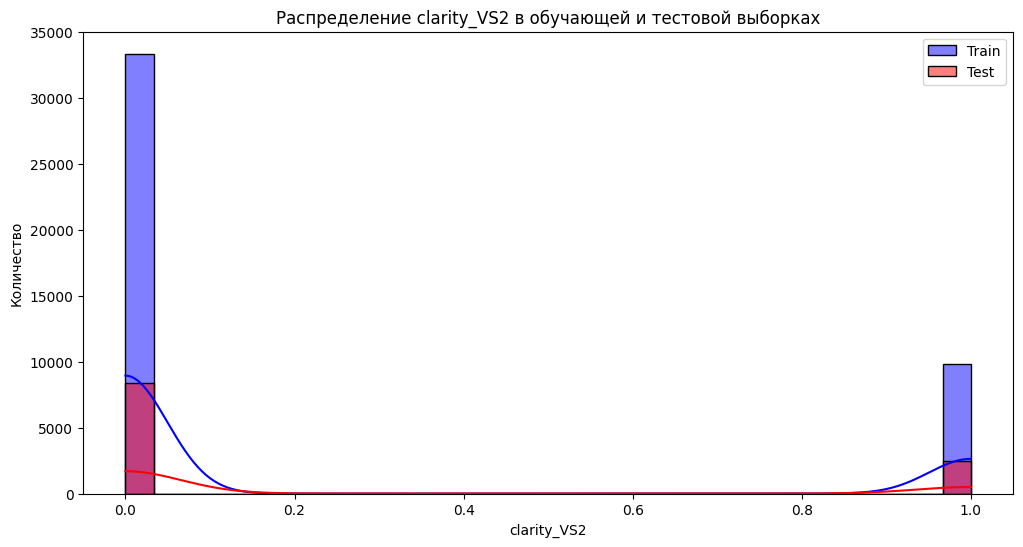

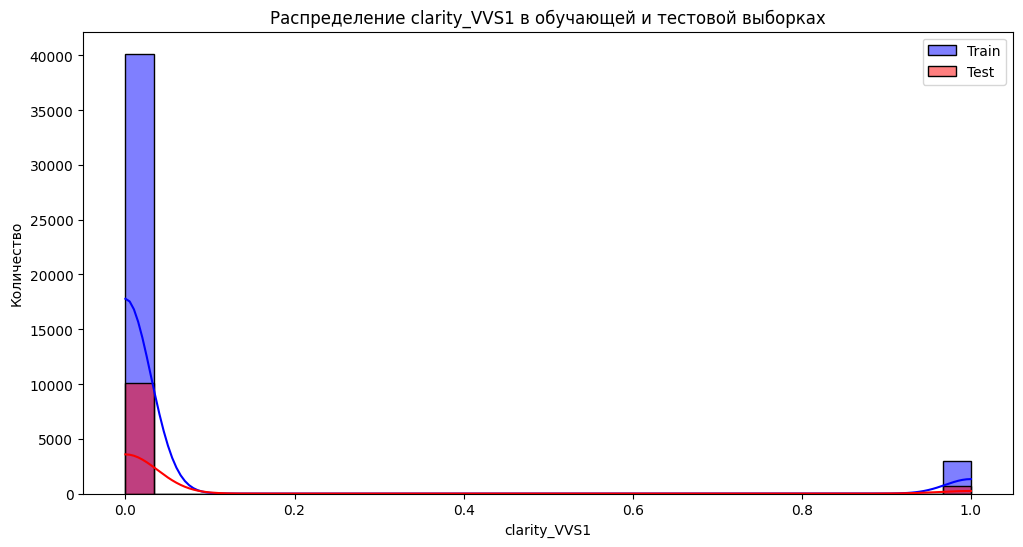

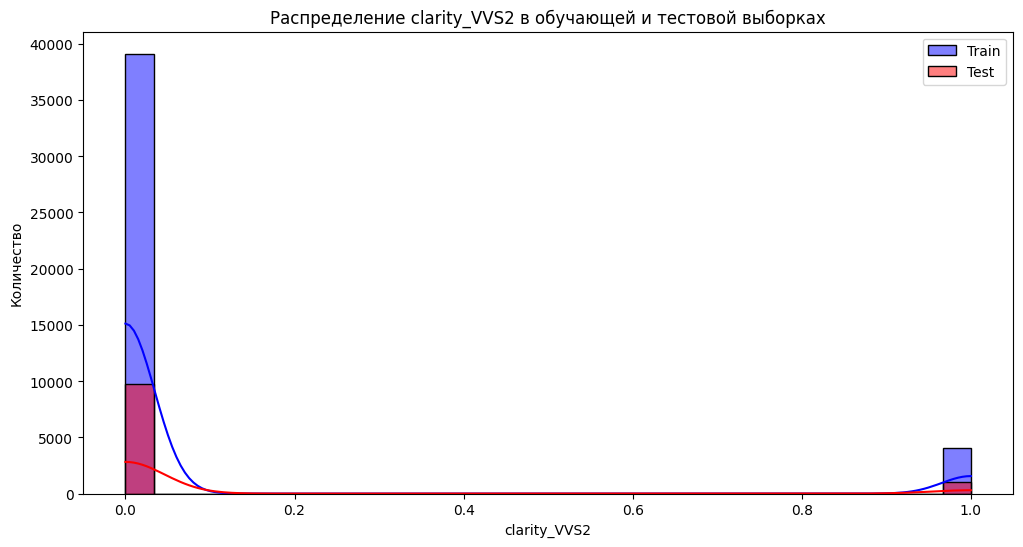

Корреляция признаков в обучающей выборке:
               Unnamed: 0     carat     depth     table         x         y  \
Unnamed: 0       1.000000 -0.397135 -0.038173 -0.109717 -0.406396 -0.404400   
carat           -0.397135  1.000000  0.012244  0.184243  0.951931  0.945835   
depth           -0.038173  0.012244  1.000000 -0.274986 -0.030762 -0.032418   
table           -0.109717  0.184243 -0.274986  1.000000  0.195246  0.188413   
x               -0.406396  0.951931 -0.030762  0.195246  1.000000  0.991915   
y               -0.404400  0.945835 -0.032418  0.188413  0.991915  1.000000   
z               -0.399257  0.928342  0.076986  0.152752  0.967789  0.962323   
cut_Good        -0.042108  0.034264  0.192864  0.163059  0.027477  0.030305   
cut_Ideal        0.114386 -0.163612 -0.020022 -0.560157 -0.162808 -0.155536   
cut_Premium     -0.052857  0.111731 -0.225003  0.373514  0.125573  0.107317   
cut_Very Good   -0.035069  0.017264  0.034832  0.137452  0.007004  0.019726   
color_E   

In [26]:
# Проверка на наличие дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")


# Проверим, какие столбцы являются категориальными
categorical_columns = X.select_dtypes(include=['object']).columns

# Применяем one-hot encoding к категориальным столбцам
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=df['cut'])

# Визуализация распределений признаков
def visualize_distribution(X_train, X_test, feature):
    plt.figure(figsize=(12, 6))
    sns.histplot(X_train[feature], bins=30, color='blue', label='Train', kde=True)
    sns.histplot(X_test[feature], bins=30, color='red', label='Test', kde=True)
    plt.title(f'Распределение {feature} в обучающей и тестовой выборках')
    plt.xlabel(feature)
    plt.ylabel('Количество')
    plt.legend()
    plt.show()

# Распределение для каждого из признаков
for feature in X_encoded.columns:
    visualize_distribution(X_train, X_test, feature)

# Проверка корреляции
correlations = X_train.corr()
print("Корреляция признаков в обучающей выборке:")
print(correlations)


# Преобразование категориальных данных в числовые
df_encoded = pd.get_dummies(df, columns=['cut'], drop_first=True)

# Разделение данных на обучающую и тестовую выборки
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Оценка выборок и Аугментация данных

In [27]:
# Проверка сбалансированности целевой переменной в обучающей выборке
cut_counts_train = y_train.value_counts()
cut_counts_test = y_test.value_counts()

print("Сбалансированность в обучающей выборке:")
print(cut_counts_train)
print("\nСбалансированность в тестовой выборке:")
print(cut_counts_test)

Сбалансированность в обучающей выборке:
price
605      109
789      106
828      102
625      101
544       98
        ... 
17050      1
15144      1
14412      1
10933      1
8340       1
Name: count, Length: 10680, dtype: int64

Сбалансированность в тестовой выборке:
price
802     33
776     29
844     29
675     26
625     25
        ..
5283     1
4143     1
1227     1
3501     1
3742     1
Name: count, Length: 5338, dtype: int64


После того как мы оценили сбалансированность, можем решить, нужно ли использовать методы аугментации данных. Например, если одна из категорий в 'cut' значительно меньше других, это может потребовать применения oversampling или undersampling.

In [28]:
# Проверка на наличие дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

# Преобразуем все категориальные данные в числовые
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Разделение данных на обучающую и тестовую выборки
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['cut'])

# Проверка сбалансированности целевой переменной
class_counts = y_train.value_counts()
print("Распределение классов в обучающей выборке:")
print(class_counts)

# Фильтрация классов с недостаточным количеством образцов
# Установим минимальное количество образцов, чтобы сохранить класс
min_samples = 2
classes_to_keep = class_counts[class_counts >= min_samples].index

X_train_filtered = X_train[y_train.isin(classes_to_keep)]
y_train_filtered = y_train[y_train.isin(classes_to_keep)]

# Применение SMOTE или RandomOverSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Используем SMOTE, если классов достаточно
if y_train_filtered.value_counts().min() > 1:
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(X_train_filtered, y_train_filtered)
else:
    # Или RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train_filtered, y_train_filtered)

# Проверка сбалансированности после oversampling
resampled_counts = y_resampled.value_counts()
print("\nСбалансированность после oversampling:")
print(resampled_counts)

Количество дубликатов: 0
Распределение классов в обучающей выборке:
price
605      106
802      105
789      103
544       99
828       99
        ... 
5084       1
13869      1
15031      1
14859      1
8417       1
Name: count, Length: 10695, dtype: int64

Сбалансированность после oversampling:
price
6750     106
3514     106
8138     106
3493     106
2780     106
        ... 
5544     106
1750     106
5182     106
815      106
12592    106
Name: count, Length: 6622, dtype: int64


Итог произвели балансировку данных. Использовались методы oversampling (увеличение данных недопредставленных категорий) и
методы SMOTE. Произвелась аугментация данных (создавались дополительные данные из имеющихся). Использование методов, таких как SMOTE или RandomOverSampler, помогло увеличить количество экземпляров редких классов в обучающей выборке, что повысило шансы модели правильно классифицировать их. 

## 3. Третий набор данных Laptop Price (Цены на ноутбуки)

Выгрузка данных из CSV файла в датафрейм

In [30]:
# Загрузка данных
df = pd.read_csv("..//static//csv//laptop_prices.csv")

# Вывод
print(df.columns)

print()

df.info()

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen   

*Датасет:* Цена ноутбука. Прайс-лист компании-производителя ноутбуков для регрессии  

Компания — производитель ноутбуков, Продукт — бренд и модель, Название типа — тип (ноутбук,ультрабук, игровой и т. д.), Дюймы — размер экрана, Разрешение экрана — разрешение экрана, Процессор — центральный процессор (ЦП), Оперативная память — оперативная память ноутбука, Память — жёсткий диск / SSD-накопитель, GPU — графические процессоры (GPU), OpSys — операционная система, Вес — вес ноутбука, Цена_в_евро — цена (в евро)

*Объекты наблюдения:* Каждый объект наблюдения в наборе данных — это конкретная модель ноутбука, представленная в прайс-листе производителя.
*Атрибуты объектов:* компания, продукт, тип, диагональ экрана ОЗУ (оперативная память), Операционная система, вес, цена, разрешение экрана, IPS-панель, модель GPU, модель процессора (CPU_model), частота процессора, производитель CPU.

*Связи между объектами:* Взаимосвязь между характеристиками ноутбуков и их ценой. Например, цена может зависеть от типа процессора, объема памяти, разрешения экрана, а также от производителя.

In [31]:
# Для наглядности
df.head()

Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageType  SecondaryStorageType  \
0            128                 0                SSD                    No   
1            128                 0      Flash Storage                    No   
2            256                 0                SSD                    No   
3            512                 0                SSD                    No   
4            256                 0                SSD                    No   

   GPU_company               GPU_model  
0        Intel  Iris Plus Graphics 640  
1        Intel        HD Graphics 6000  
2        Intel         HD Graphics 620  
3          AMD          Radeon Pro 455  
4        Intel  Iris Plus Graphics 650  

[5 rows x 23 columns]

In [32]:
# Описание данных (основные статистические показатели)
df.describe()

Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.000000          0.000000  
25%    1080.000000     2.000000      256.000000          0.000000  
50%    1080.000000     2.500000      256.000000          0.000000  
75%    1080.000000     2.700000      512.000000          0.000000  
max    2160.000000     3.600000     2048.000000       2048.000000

In [33]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [34]:
df.isnull().any()

Company                 False
Product                 False
TypeName                False
Inches                  False
Ram                     False
OS                      False
Weight                  False
Price_euros             False
Screen                  False
ScreenW                 False
ScreenH                 False
Touchscreen             False
IPSpanel                False
RetinaDisplay           False
CPU_company             False
CPU_freq                False
CPU_model               False
PrimaryStorage          False
SecondaryStorage        False
PrimaryStorageType      False
SecondaryStorageType    False
GPU_company             False
GPU_model               False
dtype: bool

Нет пропущенных данных

### Бизнес-цель
1. Оптимизация ценообразования  
Использование данных для построения модели прогнозирования цены ноутбуков на основе характеристик. Эффект: Повышение продаж за счет правильного позиционирования товаров в разных ценовых сегментах.
2. Анализ рынка и планирование производства 
Определение наиболее популярных и прибыльных конфигураций ноутбуков на основе данных о характеристиках и продажах. Эффект: Снижение издержек на производство непопулярных моделей и повышение прибыльности.

### Техническая цель
1. Прогнозирование цены ноутбуков  
Создать модель машинного обучения, которая на вход получает характеристики ноутбука (ОЗУ, CPU, объём памяти, экран и т.д.) и предсказывает его цену. 
На вход поступают характеристики, а целевой признак - цена ноутбука.  
2. Классификация сегмента ноутбука  
Создать модель для предсказания ценового сегмента в зависимости от их характеристик. На вход поступают характеристики ноутбука, а целевой признак - определение ценового сегмента (бюджетный, средний, премиум).

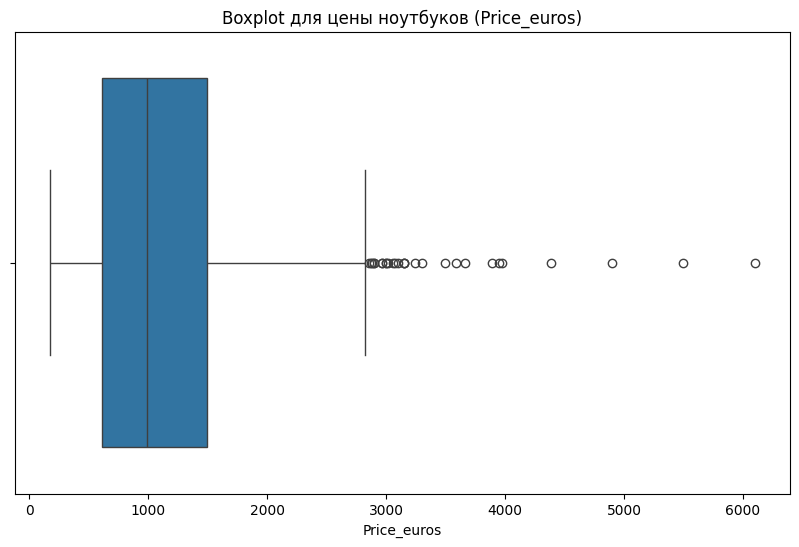

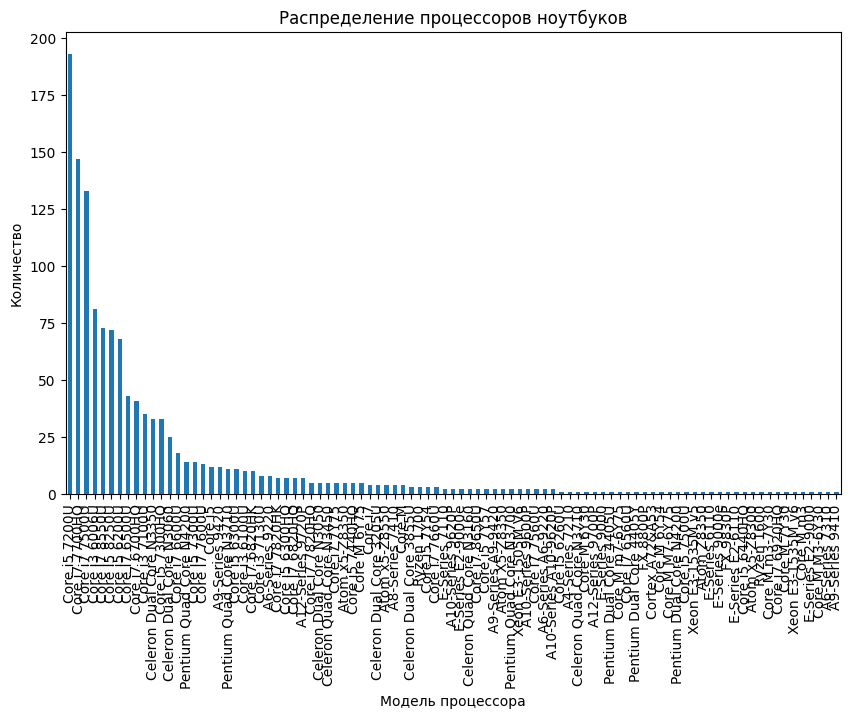

In [35]:
# Визуализация выбросов для столбца Price_euros
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price_euros'])
plt.title('Boxplot для цены ноутбуков (Price_euros)')
plt.show()


# Визуализация распределения моделей процессоров
plt.figure(figsize=(10, 6))
df['CPU_model'].value_counts().plot(kind='bar')
plt.title('Распределение процессоров ноутбуков')
plt.xlabel('Модель процессора')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

### Проблема выбранного набора данных 

**Зашумленность данных** — это наличие ненужной информации, ошибок или неверных значений, которые могут исказить анализ.
Например, в поле OS могут быть пробелы или некорректные названия операционных систем (например, "No OS", "Windows", "Windows 10").

**Смещение данных** может возникнуть, если данные отражают предпочтения определённого производителя или сегмента. Если в данных преобладает один бренд (например, Apple), это может сместить модель в сторону этого производителя.

**Актуальность данных** - неактуальные данные могут влиять на точность прогнозирования. Ноутбуки устаревают быстро, поэтому информация о старых моделях может быть неактуальной для анализа современных трендов.

**Выбросы** — это значения, которые значительно отличаются от большинства данных. Поле Price_euros может содержать аномально высокие или низкие цены, которые не соответствуют реальности.

**Просачивание данных** - это когда информация из тестовой выборки "просачивается" в обучение, что даёт модели несправедливое преимущество.

Решение: Очистить данные, убрать пробелы, проверить на корректность. Чётко разделить данные для обучения и тестирования, исключить целевые признаки из обучения. Уравнять количество данных для разных производителей или использовать методы балансировки.

Для устранения смещения применим рэсемплинг данных, либо же балансировку.

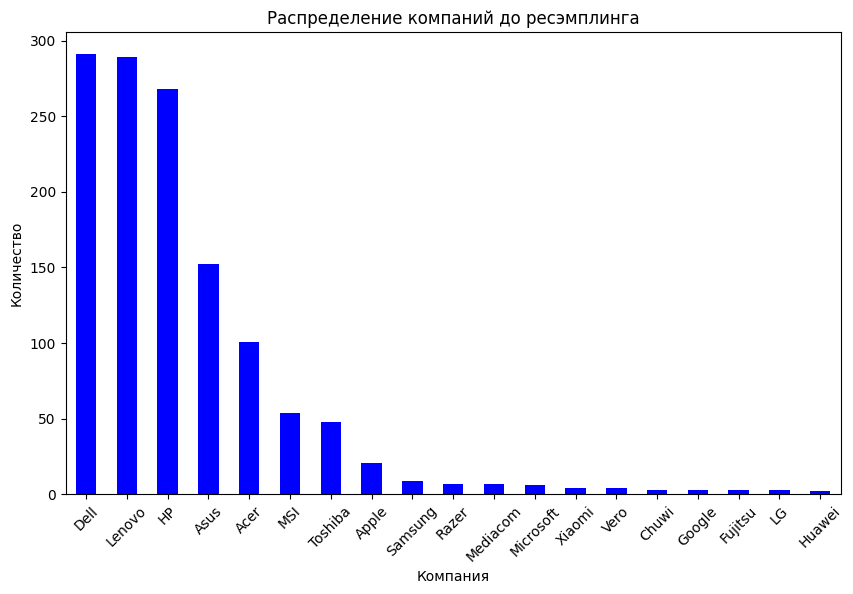

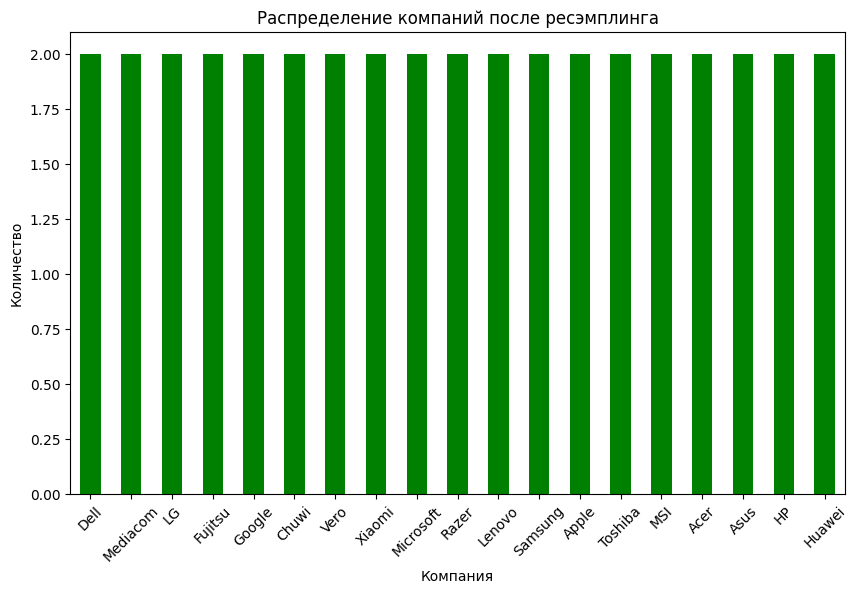

In [36]:
# Балансировка данных. Визуализация до ресэмплинга
plt.figure(figsize=(10, 6))
df['Company'].value_counts().plot(kind='bar', color='blue')
plt.title('Распределение компаний до ресэмплинга')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# Пример ресэмплинга
brand_counts = df['Company'].value_counts()
min_count = brand_counts.min()
balanced_data = pd.concat([df[df['Company'] == brand].sample(min_count) for brand in brand_counts.index])

# Визуализация после ресэмплинга
plt.figure(figsize=(10, 6))
balanced_data['Company'].value_counts().plot(kind='bar', color='green')
plt.title('Распределение компаний после ресэмплинга')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Рэсемплинг данных позволил нам изменить размер выборки, чтобы достичь более сбалансированного распределения классов, чтобы повысить общую эффективность анализа данных. Устанили перекос (дисбаланс) данных и добились более равномерное распределение компаний (брендов) ноутбуков.

Количество выявленных выбросов: 101
Количество записей после удаления выбросов: 1174


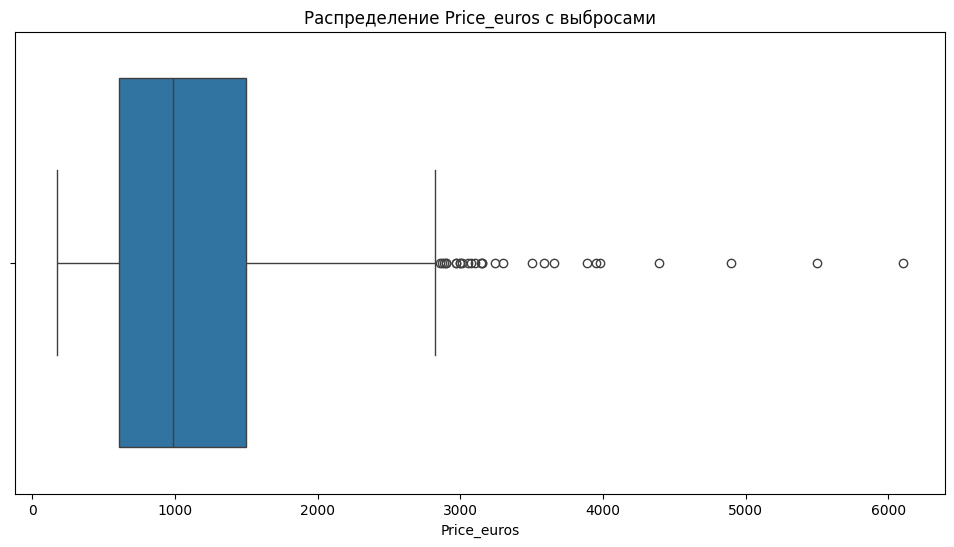

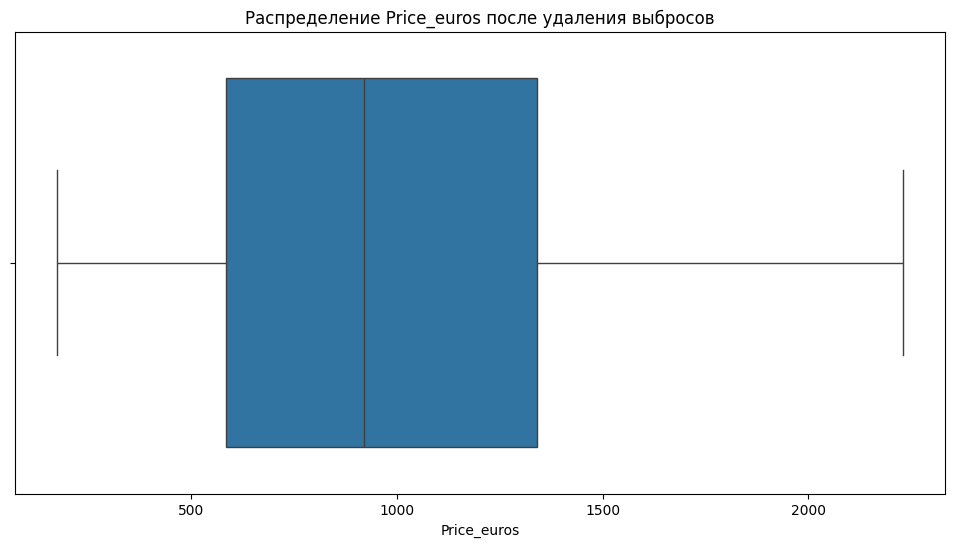

In [37]:
import numpy as np

# Вычисление медианы для 'Price_euros'
median_price = df['Price_euros'].median()

# Вычисление абсолютных отклонений от медианы
df['absolute_deviation'] = np.abs(df['Price_euros'] - median_price)

# Вычисление медианного абсолютного отклонения (MAD)
mad = df['absolute_deviation'].median()

# Определение порога для выбросов. Вы можете настроить множитель в зависимости от ваших предпочтений
threshold = 3 * mad

# Выявление выбросов
outliers = df[df['absolute_deviation'] > threshold]

# Удаление выбросов из набора данных
datalaptop_cleaned = df[df['absolute_deviation'] <= threshold].drop(columns=['absolute_deviation'])

# Вывод количества найденных выбросов и оставшихся записей
print(f"Количество выявленных выбросов: {len(outliers)}")
print(f"Количество записей после удаления выбросов: {len(datalaptop_cleaned)}")

# Визуализация результатов
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price_euros'])
plt.title('Распределение Price_euros с выбросами')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=datalaptop_cleaned['Price_euros'])
plt.title('Распределение Price_euros после удаления выбросов')
plt.show()


Медиальный способ борьбы с выбросами позволяет сохранить структуру даныых, создать устойчивость к этим выбросать, чтобы избежать смещения данных, если использовали бы среднее. Если имеются товары с высоко аномальной ценой, то замена на медиану позволит сократить влияние на данные. Удаление выбросов вдобавок и решает проблему зашумлённости данных. Выбросы - это одна из форм шума и удаление их позволяеи сделать данные чище и менее зашумлённые.

Размер обучающей выборки: 765
Размер валидационной выборки: 255
Размер тестовой выборки: 255
Company                 float64
Product                 float64
TypeName                float64
Inches                  float64
Ram                       int64
OS                      float64
Weight                  float64
Screen                  float64
ScreenW                   int64
ScreenH                   int64
Touchscreen             float64
IPSpanel                float64
RetinaDisplay           float64
CPU_company             float64
CPU_freq                float64
CPU_model               float64
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType      float64
SecondaryStorageType    float64
GPU_company             float64
GPU_model               float64
absolute_deviation      float64
dtype: object


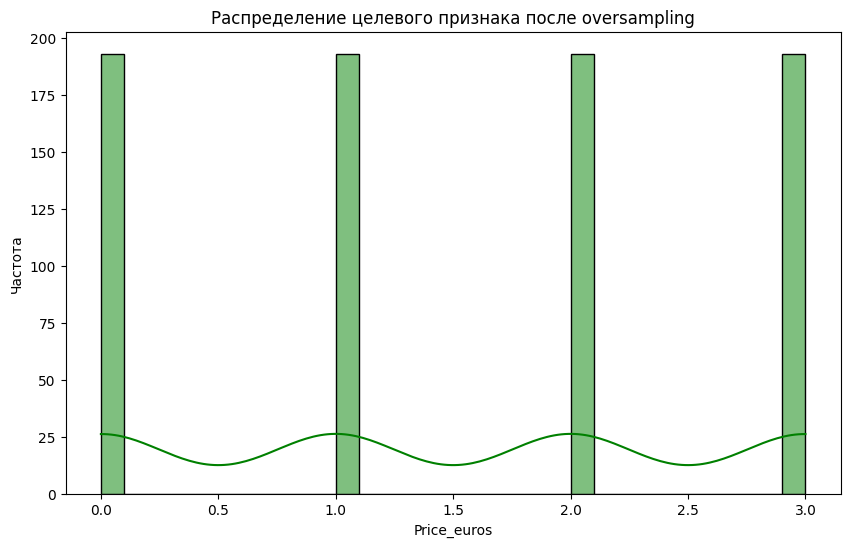

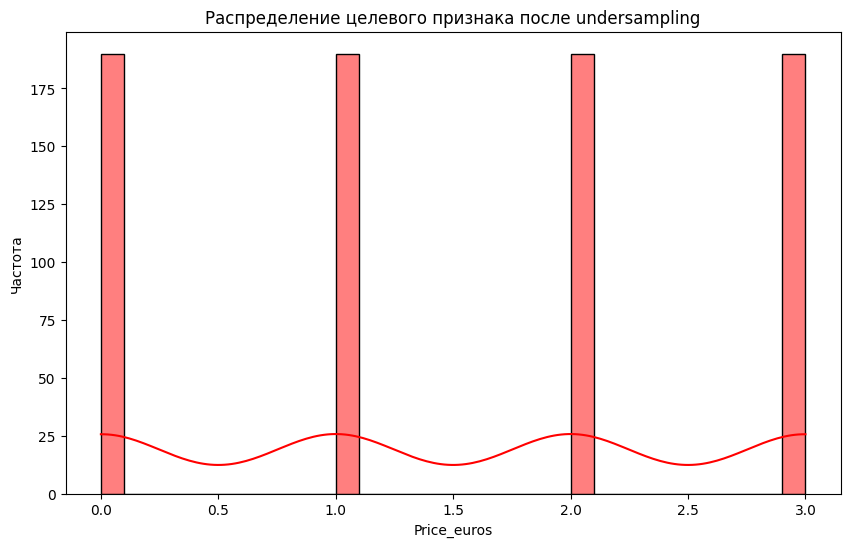

Количество записей в обучающей выборке до аугментации: 765
Количество записей в обучающей выборке после oversampling: 772
Количество записей в обучающей выборке после undersampling: 760


In [38]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Разделение признаков и целевой переменной
X = df.drop(columns=['Price_euros'])  # Признаки
y = df['Price_euros']  # Целевая переменная (для регрессии)

# Разбиение данных на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер валидационной выборки: {len(X_val)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Все типы к числовым приводим
X_train = X_train.apply(pd.to_numeric, errors='coerce')
print(X_train.dtypes)

# Квантилизация целевой переменной для создания категорий
y_train_cat = pd.qcut(y_train, q=4, labels=False)

# Объединяем исходные данные и "шумные" данные для увеличения обучающей выборки
X_train_combined = np.vstack([X_train, X_train])
y_train_combined = np.hstack([y_train, y_train])  # Убедитесь, что y_train повторяется для новых данных

# Применение oversampling и undersampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train_cat)

# Проверка распределения после oversampling
plt.figure(figsize=(10, 6))
sns.histplot(y_train_ros, bins=30, kde=True, color='green')
plt.title('Распределение целевого признака после oversampling')
plt.xlabel('Price_euros')
plt.ylabel('Частота')
plt.show()

# Применение RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train_cat)

# Проверка распределения после undersampling
plt.figure(figsize=(10, 6))
sns.histplot(y_train_rus, bins=30, kde=True, color='red')
plt.title('Распределение целевого признака после undersampling')
plt.xlabel('Price_euros')
plt.ylabel('Частота')
plt.show()

# Вывод количества данных до и после аугментации
print(f"Количество записей в обучающей выборке до аугментации: {len(y_train)}")
print(f"Количество записей в обучающей выборке после oversampling: {len(y_train_ros)}")
print(f"Количество записей в обучающей выборке после undersampling: {len(y_train_rus)}")

Набор данных, судя по числам, был относительно сбалансирован, и применение oversampling/undersampling не сильно изменил размер выборок. Использование RandomOverSampler и RandomUnderSampler для регрессионных задач не является оптимальным решением, поскольку эти методы предназначены для классификации.

Таким образом, мы проанализировали 3 датасета. Посмотрели какие проблемы с ними могут быть связаны, возможные пути их решения. 
Разбили выборки, далее их сбалансировали, с помощью методов OverSampling и UnderSampling. Методы oversampling и undersampling лучше использовать для задач классификации, где целевая переменная — дискретные классы. Для регрессионных задач эти методы напрямую не применимы. Методы аугментации данных для регрессии, такие как SMOTE для регрессии, могут также помочь в увеличении количества обучающих данных и улучшении качества модели.